## SA STEP1 cmax -> GPP (+-.75)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import utils as ut
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
path='TK/sa-cmax-TK-075-EJ/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)
param_name = ['cmax0','cmax1','cmax2','cmax3','cmax4','cmax5','cmax6','cmax7']
df_param.columns = param_name
model_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7']
df_model.columns = model_name

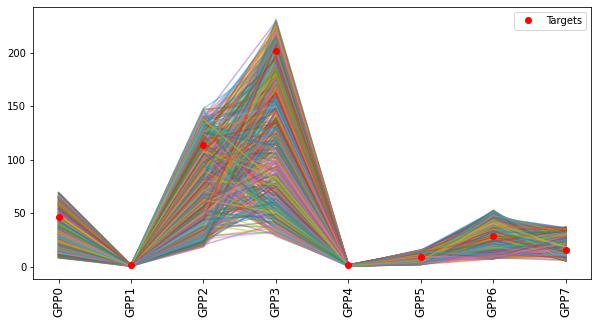

In [7]:
ut.spaghetti_match_plot(df_param,df_model)

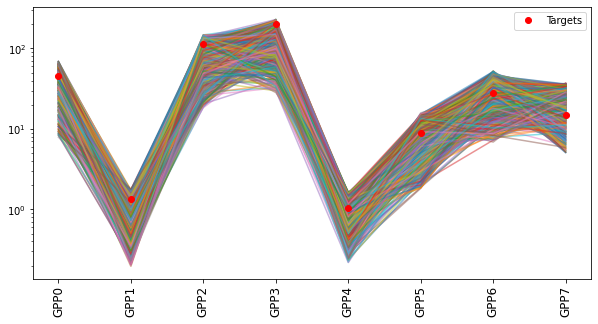

In [5]:
ut.spaghetti_match_plot(df_param,df_model,logy=True)

In [65]:
cat TK/sa-cmax-TK-075-EJ/param_props.csv

name,bounds,initial,cmtnum,pftnum
cmax,"[26.0, 182.0]",104.0,5,0
cmax,"[0.9750000000000001, 6.824999999999999]",3.9,5,1
cmax,"[62.5, 437.5]",250.0,5,2
cmax,"[98.0, 686.0]",392.0,5,3
cmax,"[0.8125, 5.6875]",3.25,5,4
cmax,"[7.5, 52.5]",30.0,5,5
cmax,"[23.75, 166.25]",95.0,5,6
cmax,"[16.25, 113.75]",65.0,5,7


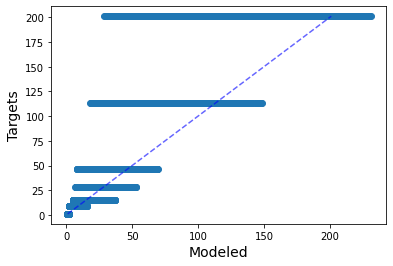

In [66]:
ut.one_to_one_match_plot(df_model)

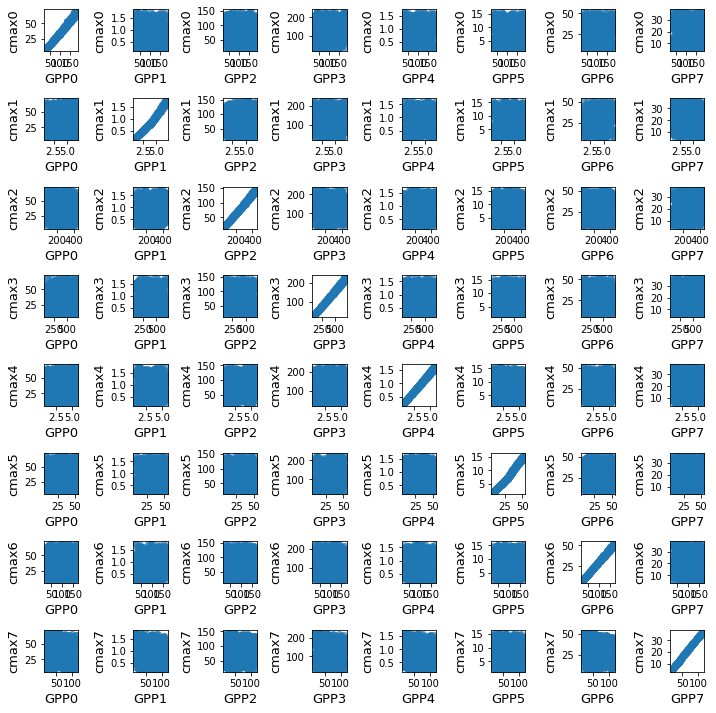

In [68]:
[n,m]=df_param.shape
fig, axs = plt.subplots(nrows=m, ncols=8, figsize=(10,10))
for i in range(m):
    for j in range(8):
        axs[i,j].scatter(df_param.iloc[0:n,i], df_model.iloc[0:n,j],alpha=0.6)
        axs[i,j].set_xlabel(df_model.columns[j],FontSize=13)
        axs[i,j].set_ylabel(df_param.columns[i],FontSize=13)
fig.tight_layout() 

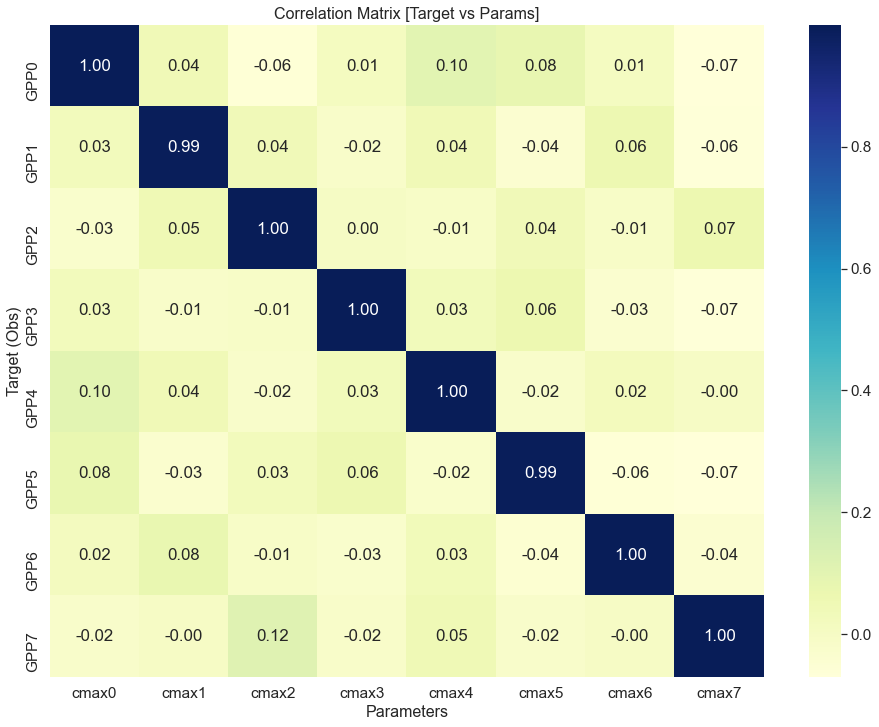

In [69]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

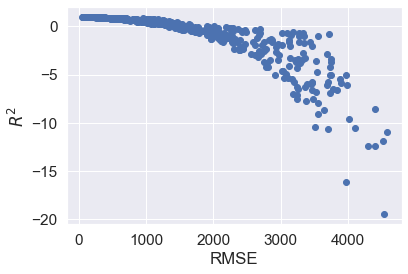

In [71]:
ut.plot_r2_rmse(df_model);

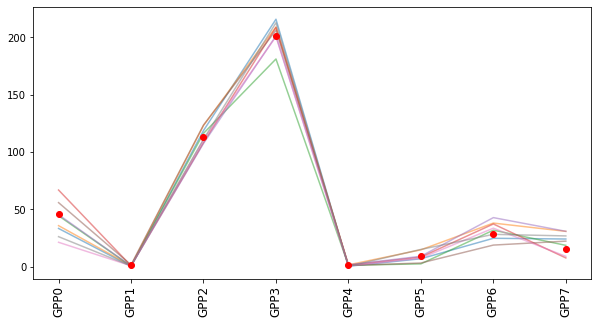

In [6]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.98)

In [ ]:
xparams_TK, ymodel_TK =  ut.get_params_r2_rmse(df_param_TK,df_model_TK,r2lim=0.97)

In [78]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.98)
xparams

cmax0     cmax1       cmax2       cmax3     cmax4      cmax5  \
8     97.235824  1.022861  367.273690  670.700748  0.994697  27.986176   
67   106.034551  3.799534  388.702727  664.084444  5.475682  51.512854   
80   124.039456  2.028475  353.780579  554.279475  3.881840   9.697099   
85   176.005004  3.261956  324.461411  623.524625  4.021469  31.393316   
182  132.049730  2.313662  344.150736  641.973926  5.484456  34.856379   
211  153.017953  6.090471  374.468638  630.891314  3.174808  12.815366   
219   62.014115  3.070398  330.474979  600.761538  1.877647  28.358533   
392   78.378781  2.386491  347.737068  665.379339  0.905652  51.997046   
395  128.363140  3.251223  284.841737  594.005933  1.863854  34.308899   

          cmax6      cmax7     $R^2$       RMSE      MAPE  
8     83.002432  73.943146  0.987425  63.755588  1.209331  
67   128.582781  94.962189  0.982703  80.095658  0.329247  
80   104.096084  56.755913  0.984166  59.505555  0.692875  
85   120.013739  24.636913  0.982469  81.530560  0.345661  
182  144.595877  95.376971  0.984928  62.051089  0.399429  
211   62.570652  67.709527  0.989733  49.300378  0.403561  
219  107.351551  28.752295  0.980511  87.227185  0.529472  
392   94.905650  82.244975  0.981076  89.671891  0.838420  
395   84.683947  57.115267  0.983969  62.089771  0.319202

In [29]:
def z_score(y_short,y_long,outnames):
    '''
    NOTE: this function assumes that last row in y_long is target
    
    y_short: model dataframe restricted by R2
    y_long : full model dataframe 
    outnames : dataframe header
    '''

    zscore=[]
    for iname in outnames:
        zscore.append((y_short[iname].mean()-y_long[iname].iloc[-1])/y_short[iname].std())
    
    return zscore

z=z_score(ymodel,df_model,model_name)



In [30]:
z

[-0.10059029506773771,
 -0.02212130145972047,
 0.10244091114507003,
 -0.3885393980459975,
 0.4750119266494441,
 0.30552513044353896,
 0.004560478931589744]

In [32]:
for iname in model_name:
    zscore=(ymodel[iname].mean()-df_model[iname].iloc[-1])/ymodel[iname].std()
    print(iname,zscore)

GPP0 -0.10059029506773771
GPP1 -0.02212130145972047
GPP2 0.10244091114507003
GPP3 -0.3885393980459975
GPP4 0.4750119266494441
GPP5 0.30552513044353896
GPP6 0.004560478931589744


In [18]:
df_model.tail()

GPP0        GPP1        GPP2      GPP3       GPP4       GPP5  \
496  26.532146   81.240359  263.846013  0.808996  10.564452  40.578229   
497  12.261586  192.047080  181.276690  2.028746  13.495712  24.657890   
498  28.686541   70.183545  225.322414  1.400460  18.151696  60.007155   
499  27.395524  182.109782  412.989924  0.789225   7.958174  27.284359   
500  21.831000  132.247000  301.400000  1.792000  15.469000  49.072000   

          GPP6  
496  11.589434  
497  32.243303  
498  10.740270  
499  11.739226  
500  26.139000

In [28]:
xparams.GPP0/describe()

cmax0       cmax1       cmax2      cmax3      cmax4      cmax5  \
count  18.000000   18.000000   18.000000  18.000000  18.000000  18.000000   
mean   30.646745  182.165056  439.637983   3.279835  27.497734  80.047517   
std     8.974921   12.885922   16.181785   0.976680   6.798052  15.579885   
min    18.592030  158.832954  413.449409   1.813062  14.823486  42.830947   
25%    25.397005  173.547312  430.374447   2.462609  21.835929  69.250479   
50%    30.329437  181.190209  438.534799   3.506230  30.113183  82.676428   
75%    35.381296  191.935493  451.775168   4.166846  32.548944  93.862831   
max    48.048475  205.854572  466.500028   4.670679  35.557503  97.523836   

           cmax6      $R^2$       RMSE       MAPE  
count  18.000000  18.000000  18.000000  18.000000  
mean   46.539649   0.993429  65.512061   0.226290  
std    10.174212   0.001915  19.187789   0.076537  
min    30.499181   0.990374  21.411178   0.097096  
25%    37.746230   0.992321  51.816722   0.191640  
50%    45.653420   0.993232  69.120535   0.219817  
75%    55.785168   0.994705  75.379948   0.264809  
max    59.863514   0.997728  95.117938   0.384216

In [29]:
cat EML/SA-cmax-EML-05/param_props.csv

name,bounds,initial,cmtnum,pftnum
cmax,"[16.5, 49.5]",33.0,21,0
cmax,"[86.0, 258.0]",172.0,21,1
cmax,"[215.0, 645.0]",430.0,21,2
cmax,"[1.6, 4.800000000000001]",3.2,21,3
cmax,"[12.0, 36.0]",24.0,21,4
cmax,"[37.5, 112.5]",75.0,21,5
cmax,"[21.5, 64.5]",43.0,21,6


In [27]:
ymodel.describe()

GPP0        GPP1        GPP2       GPP3       GPP4       GPP5  \
count  18.000000   18.000000   18.000000  18.000000  18.000000  18.000000   
mean   21.158401  132.023036  302.549030   1.581241  17.649751  52.252318   
std     6.686522   10.124344   11.216512   0.542438   4.590940  10.409350   
min    12.304583  113.888020  284.203568   0.786263   9.171354  27.571963   
25%    17.204775  125.520767  296.478729   1.115536  13.766175  44.970070   
50%    20.767006  131.258213  302.380203   1.687356  19.410021  53.986281   
75%    24.526889  139.387224  310.822564   2.073451  21.120503  61.348999   
max    34.367992  150.852541  321.556604   2.389929  23.115976  63.930171   

            GPP6  
count  18.000000  
mean   26.175793  
std     8.067779  
min    13.388486  
25%    19.198879  
50%    25.677538  
75%    33.520027  
max    36.670447

In [11]:
[df_param,df_model]=get_sa_data_soilc_all('data/sa-step4-md1-soil-099-kdcsomcr-kdcsompr-fixed/')

In [12]:
cat data/sa-step4-md1-soil-099-kdcsomcr-kdcsompr-fixed/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[0.004495000000000027, 0.894505]",0.4495,1,None
kdcrawc,"[0.006340000000000012, 1.26166]",0.634,1,None
kdcsoma,"[0.00539999999999996, 1.0746000000000002]",0.54,1,None
kdcsompr,"[0.0005, 0.002]",0.002,1,None
kdcsomcr,"[1.75e-05, 9e-05]",7e-05,1,None


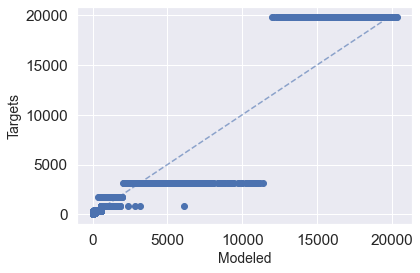

In [13]:
ut.one_to_one_match_plot(df_model)

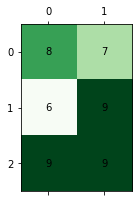

In [35]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2, 4))

intersection_matrix = np.random.randint(0, 10, size=(3, 2))

[nrows,mcols]=intersection_matrix.shape
ax.matshow(intersection_matrix, cmap=plt.cm.Greens)

for i in range(0,mcols):
    for j in range(0,nrows):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

##  Calibration (setup similar to the SA 0.5 and bound)

In [16]:
ls EML/eml-step1-cmax/

out_step1-eml.csv    param_step1-eml.csv


In [18]:
path='EML/eml-step1-cmax/' #10% variance
params='param_step1-eml.csv'
model='out_step1-eml.csv'
df_model = pd.read_csv(path+model,header=None)

output_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6']
df_model.columns = output_name

df_param = pd.read_csv(path+params,header=None)
output_name = ['cmax0','cmax1','cmax2','cmax3','cmax4','cmax5','cmax6']
df_param.columns = output_name
df_model.head()
df_model.shape

(11, 7)

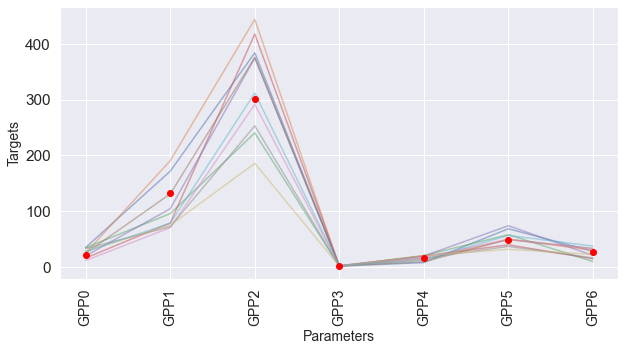

In [19]:
ut.spaghetti_match_plot(df_param,df_model)
#ut.spaghetti_match_plot(df_param,df_model,logy=True)

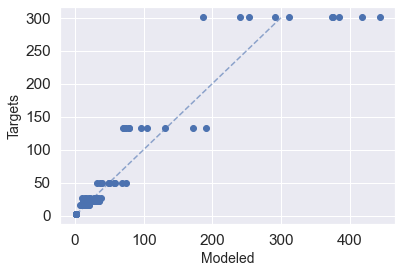

In [20]:
ut.one_to_one_match_plot(df_model)

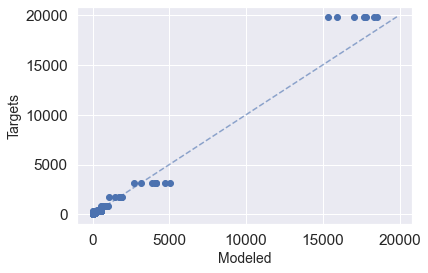

In [26]:
ut.one_to_one_match_plot(df_model)

In [21]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.9)
xparams[xparams.MAPE<1]

cmax0       cmax1       cmax2     cmax3      cmax4       cmax5  \
0  48.767689  231.890975  558.403703  2.916246  12.515575  103.745380   
4  29.333123  147.209079  545.518501  4.428274  30.344541  112.357576   
5  35.431116  180.923756  545.810565  3.824423  15.104614   75.482690   
6  17.735666  102.923371  426.914143  3.337481  26.783109   76.999480   
9  39.255893  112.775942  453.289151  4.208610  19.969817   86.683371   

       cmax6     $R^2$         RMSE      MAPE  
0  48.505548  0.921459  1284.031815  0.348130  
4  39.539293  0.934276   975.746171  0.222881  
5  55.398482  0.947404   801.789179  0.175757  
6  54.355149  0.934340   580.272717  0.321126  
9  60.918076  0.953227   463.649772  0.248989

In [172]:
ls TK/ca-cmax-TK-075-EJ/

ca-cmax-GPP-TK-075-EJ.zip  param_cmax-tk.csv
out_cmax-tk.csv


## nmax +- 0.75 (almost prefect)

In [37]:
path='TK/ca-cmax-TK-075-EJ/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)
param_name = ['nmax0','nmax1','nmax2','nmax3','nmax4','nmax5','nmax6', 'nmax7']
df_param.columns = param_name
model_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7', \
              'NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07', \
              'VEGC01','VEGC11','VEGC12', \
              'VEGC20','VEGC21','VEGC22','VEGC23','VEGC24']

df_model.columns = model_name
df_model.head()

GPP0      GPP1       GPP2        GPP3      GPP4      GPP5       GPP6  \
0  36.055786  0.811353  78.813570  122.914040  0.901608  7.561979  28.503307   
1  36.055780  0.811353  78.813562  122.914026  0.901608  7.561983  28.503307   
2  36.055771  0.811354  78.813549  122.914009  0.901608  7.561996  28.503307   
3  36.055774  0.811353  78.813554  122.914016  0.901608  7.561986  28.503307   
4  36.055791  0.811353  78.813577  122.914051  0.901608  7.561979  28.503306   

        GPP7       NPP0      NPP1  ...     VEGC06      VEGC07      VEGC01  \
0  21.062435  15.372564  0.447645  ...  37.865268  245.634261  152.676141   
1  21.062435  15.372562  0.447645  ...  37.865269  245.633012  152.675539   
2  21.062436  15.372558  0.447646  ...  37.865260  245.633195  152.675615   
3  21.062436  15.372559  0.447645  ...  37.865266  245.632628  152.675264   
4  21.062434  15.372567  0.447645  ...  37.865272  245.634138  152.676111   

      VEGC11      VEGC12    VEGC20    VEGC21     VEGC22     VEGC23     VEGC24  
0  56.012808  166.497324  0.590136  2.676217  34.367681  52.415082  79.665936  
1  56.012801  166.497221  0.590136  2.676219  34.367708  52.415082  79.665936  
2  56.012804  166.496341  0.590136  2.676220  34.367772  52.415082  79.665936  
3  56.012796  166.497237  0.590136  2.676217  34.367723  52.415082  79.665936  
4  56.012813  166.497278  0.590136  2.676217  34.367682  52.415081  79.665936  

[5 rows x 32 columns]

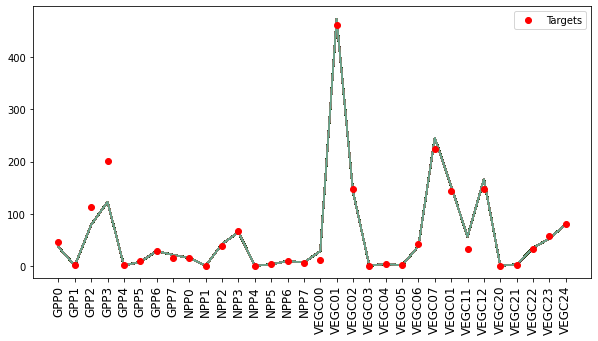

In [38]:
ut.spaghetti_match_plot(df_param,df_model)

In [54]:
path='TK/ca-cmax-TK-075-EJ/' #10% variance
params='param_cmax-tk.csv'
model='out_cmax-tk.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
param_name = ['cmax0','cmax1','cmax2','cmax3','cmax4','cmax5','cmax6','cmax7']
df_param.columns = param_name
model_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7', \
              'NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07', \
              'VEGC01','VEGC11','VEGC12', \
              'VEGC20','VEGC21','VEGC22','VEGC23','VEGC24']
df_model.columns = model_name
#print(df_param.shape,df_model.shape)

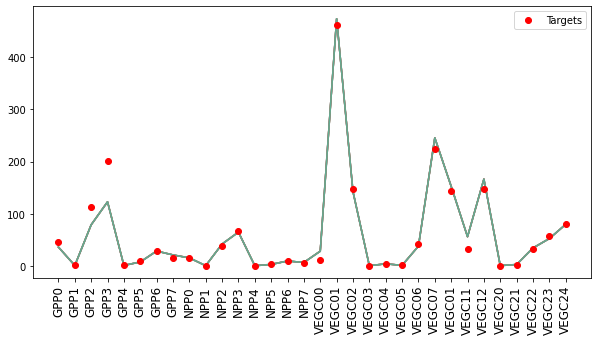

In [56]:
ut.spaghetti_match_plot(df_param,df_model)

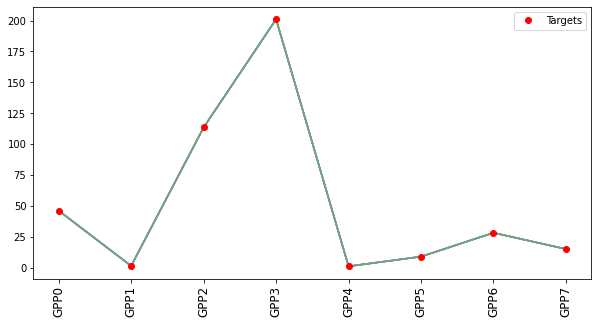

In [57]:
path='TK/ca-cmax-GPP-TK-075-EJ/' #10% variance
params='param_cmax-tk.csv'
model='out_cmax-tk.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
param_name = ['cmax0','cmax1','cmax2','cmax3','cmax4','cmax5','cmax6','cmax7']
df_param.columns = param_name
model_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7']
df_model.columns = model_name
#print(df_param.shape,df_model.shape)
ut.spaghetti_match_plot(df_param,df_model)

In [58]:
df_param.describe()

cmax0      cmax1       cmax2       cmax3      cmax4      cmax5  \
count   10.000000  10.000000   10.000000   10.000000  10.000000  10.000000   
mean   127.232685   5.533420  342.320698  608.401439   3.618420  33.025164   
std      0.003258   0.010987    0.008889    0.019060   0.001725   0.002529   
min    127.228445   5.504476  342.312216  608.383145   3.614793  33.020261   
25%    127.230923   5.534656  342.314437  608.389508   3.617643  33.025049   
50%    127.232568   5.537644  342.319228  608.398249   3.619466  33.025093   
75%    127.233316   5.539439  342.323025  608.406396   3.619592  33.025135   
max    127.239478   5.539917  342.341725  608.448293   3.619874  33.030935   

           cmax6      cmax7  
count  10.000000  10.000000  
mean   92.008674  46.990761  
std     0.001331   0.007049  
min    92.005504  46.982966  
25%    92.008564  46.986487  
50%    92.008844  46.988373  
75%    92.008977  46.992370  
max    92.010998  47.006733

In [59]:
df_param

cmax0     cmax1       cmax2       cmax3     cmax4      cmax5  \
0  127.232133  5.534266  342.320861  608.402549  3.617682  33.025093   
1  127.239478  5.536865  342.327134  608.410679  3.619488  33.030935   
2  127.231634  5.538423  342.317596  608.393949  3.619444  33.025151   
3  127.228950  5.539476  342.314548  608.390386  3.619594  33.025131   
4  127.228445  5.539441  342.312216  608.384574  3.619874  33.025136   
5  127.233004  5.504476  342.341725  608.448293  3.616451  33.020261   
6  127.230685  5.526075  342.314400  608.389216  3.614793  33.024740   
7  127.233081  5.535825  342.323297  608.406991  3.617631  33.025094   
8  127.236047  5.539433  342.322208  608.404610  3.619586  33.025047   
9  127.233394  5.539917  342.312993  608.383145  3.619658  33.025054   

       cmax6      cmax7  
0  92.008843  46.992521  
1  92.008338  47.006733  
2  92.008998  46.991917  
3  92.008845  46.986455  
4  92.008930  46.989649  
5  92.010998  46.982966  
6  92.005504  46.985767  
7  92.008992  46.997920  
8  92.008484  46.986581  
9  92.008804  46.987096

## krb

In [ ]:
path='TK/sa-nmax-TK-EJ-bound/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)


In [123]:
path='TK/sa-krb-TK-EJ/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)
param_name = ['rkb00','krb01','krb02','krb03','krb04','krb05','krb06','krb07', \
              'krb10','krb11','krb12', \
              'krb20','krb21','krb22','krb23','krb24']
df_param.columns = param_name
model_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7', \
              'NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07', \
              'VEGC10','VEGC11','VEGC12', \
              'VEGC20','VEGC21','VEGC22','VEGC23','VEGC24']
df_model.columns = model_name

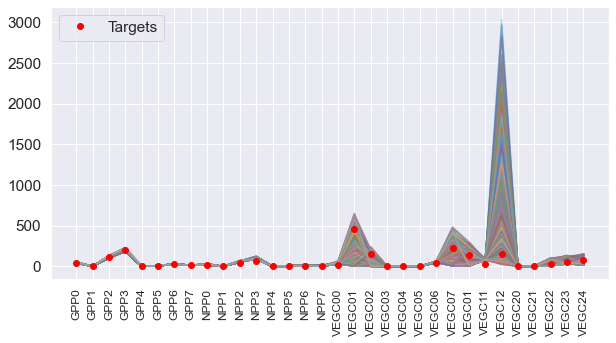

In [113]:
ut.spaghetti_match_plot(df_param,df_model)

## cfall with GPP excluded

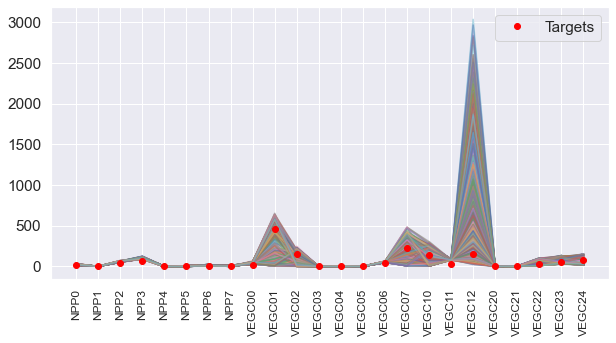

In [180]:
#krb without GPP 
path='TK/sa-krb-NPPVEGC-TK-EJ-075/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)
param_name = ['rkb00','krb01','krb02','krb03','krb04','krb05','krb06','krb07', \
              'krb10','krb11','krb12', \
              'krb20','krb21','krb22','krb23','krb24']
df_param.columns = param_name
model_name = [
              'NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07', \
              'VEGC10','VEGC11','VEGC12', \
              'VEGC20','VEGC21','VEGC22','VEGC23','VEGC24']
df_model.columns = model_name
ut.spaghetti_match_plot(df_param,df_model)

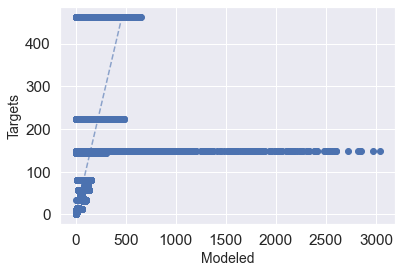

In [181]:
ut.one_to_one_match_plot(df_model)

In [184]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.93)
xparams

rkb00     krb01     krb02     krb03     krb04     krb05     krb06  \
229 -2.842853 -2.186408 -1.722820 -1.191432 -1.417365 -2.794170 -0.900776   
281 -1.228902 -1.982714 -0.483874 -1.231502 -1.550072 -3.041696 -4.516509   

        krb07     krb10      krb11     krb12     krb20      krb21     krb22  \
229 -4.925163 -8.386451  -3.553267 -6.371414 -7.003466  -4.724027 -6.403621   
281 -4.936394 -7.654494 -11.716975 -6.418226 -8.688609 -10.981354 -5.753648   

        krb23     krb24     $R^2$        RMSE      MAPE  
229 -2.742268 -9.433602  0.937307  890.861410  0.933690  
281 -3.167889 -9.444233  0.933575  778.211078  0.461438

In [186]:
ymodel

NPP0      NPP1       NPP2        NPP3      NPP4      NPP5  \
229  24.981640  0.601122  65.107361   95.174990  0.459384  1.246490   
281  18.398832  0.818184  53.842814  101.995779  0.455109  1.391613   

          NPP6      NPP7     VEGC00      VEGC01  ...     VEGC06      VEGC07  \
229   5.255560  8.879777  46.095235  548.037488  ...  60.353922  272.371991   
281  18.460864  8.704550  32.934773  490.311938  ...  48.316957  261.778180   

         VEGC10     VEGC11     VEGC12    VEGC20    VEGC21     VEGC22  \
229  175.810994  83.572499  91.369156  0.722781  5.034414  14.737243   
281  121.233283  88.636375  63.120251  0.718996  4.968933  16.689062   

         VEGC23      VEGC24  
229   28.787004  105.499611  
281  103.771365  104.564939  

[2 rows x 24 columns]

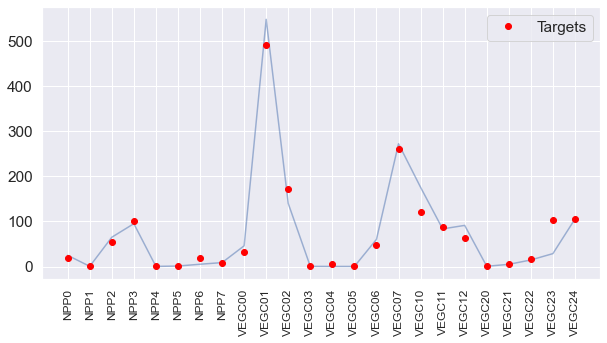

In [185]:
ut.spaghetti_match_plot(xparams, ymodel)

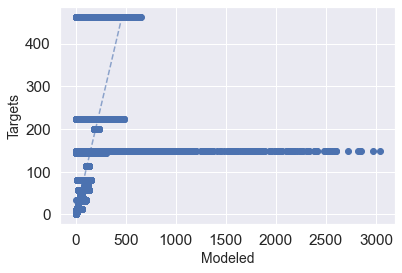

In [86]:
ut.one_to_one_match_plot(df_model)

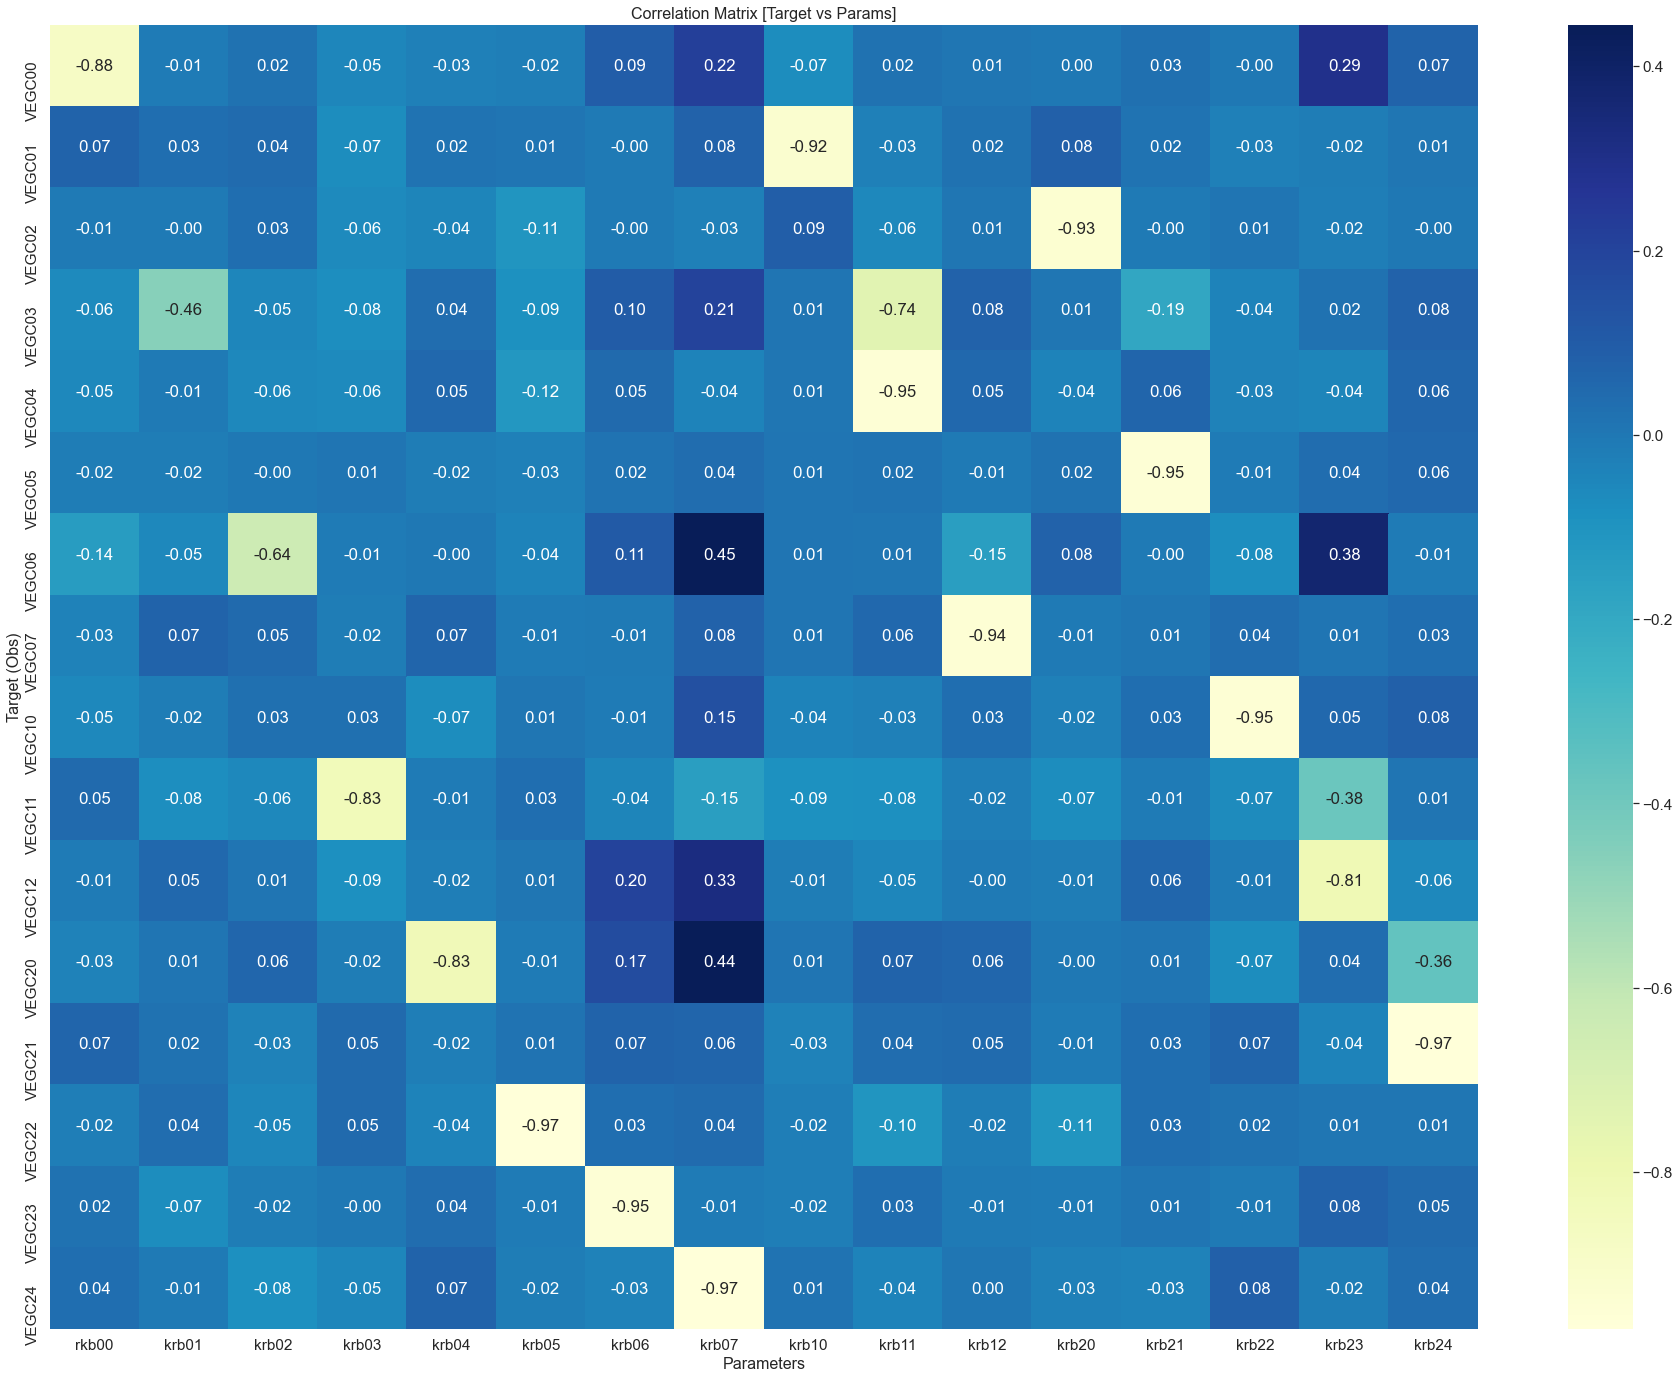

In [124]:
corr_mp=ut.get_output_param_corr(df_param,df_model.iloc[:,16:])

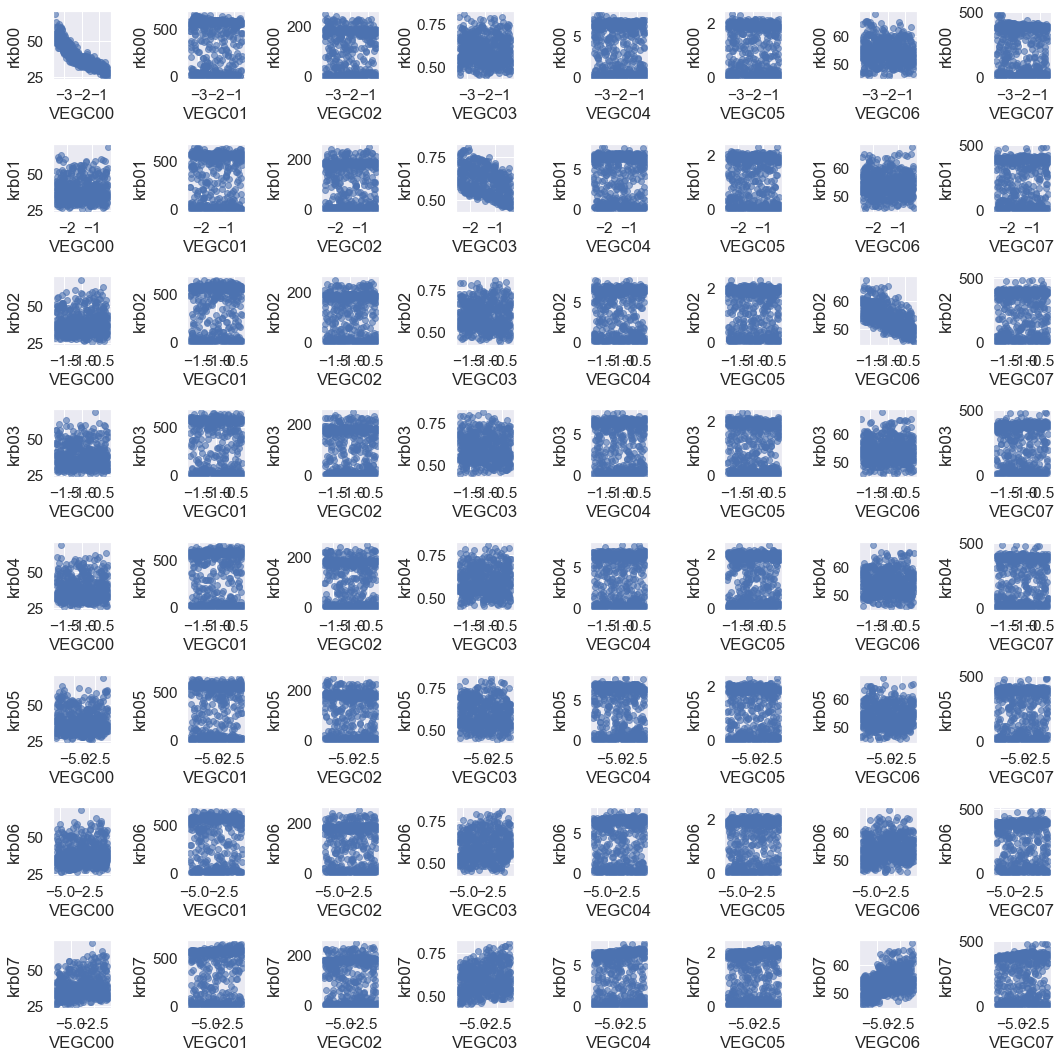

In [136]:
[n,m]=df_param.shape
m=8
n=8
fig, axs = plt.subplots(nrows=m, ncols=n, figsize=(16,16))
for i in range(m):
    for j in range(n):
        axs[i,j].scatter(df_param.iloc[0:500,i], new_model.iloc[0:500,j],alpha=0.6)
        axs[i,j].set_xlabel(new_model.columns[j])
        axs[i,j].set_ylabel(df_param.columns[i])
fig.tight_layout() 

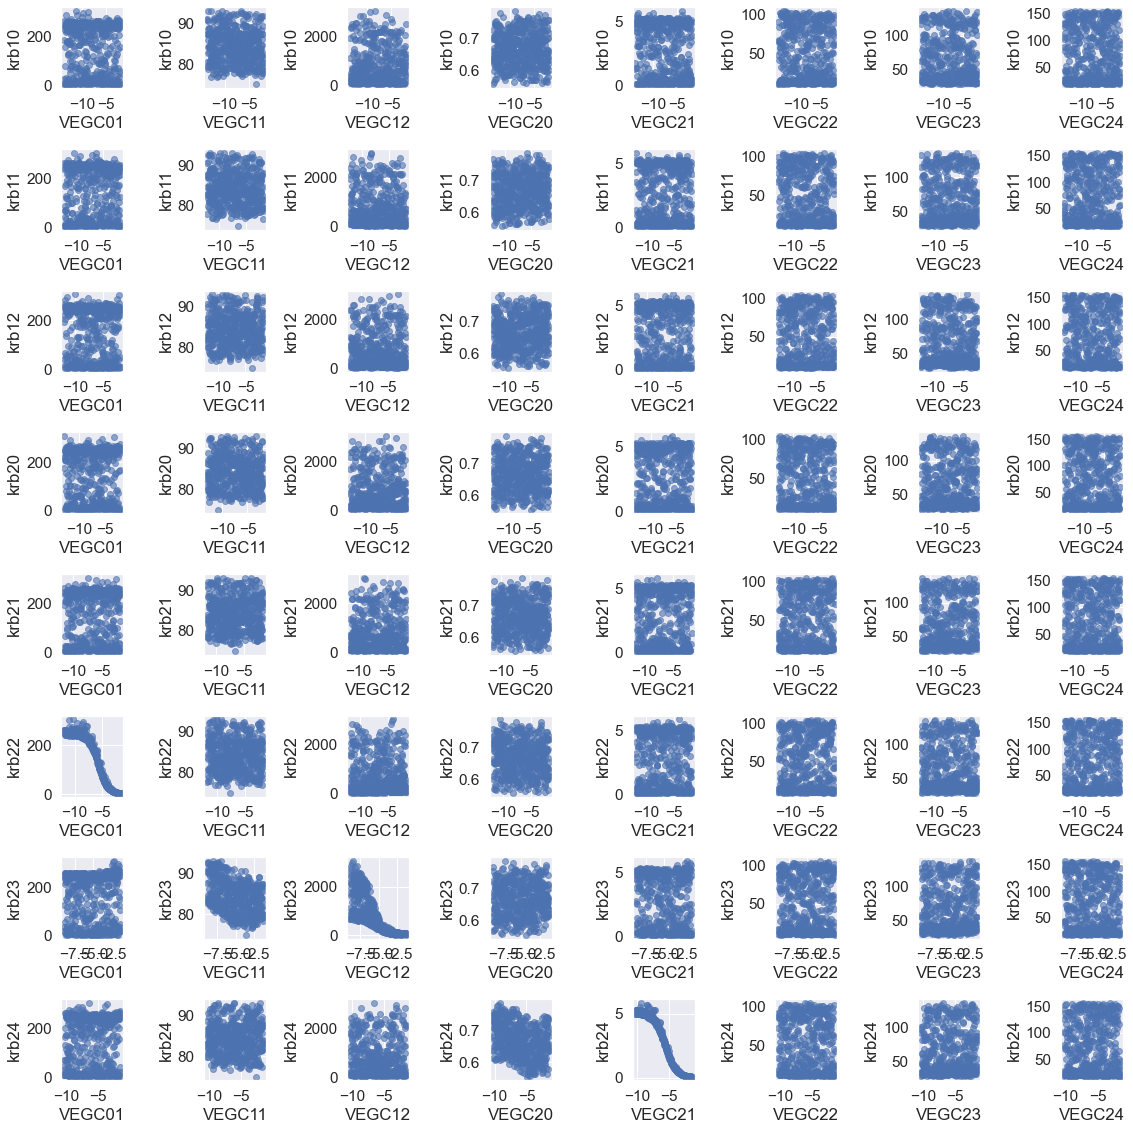

In [140]:
fig, axs = plt.subplots(nrows=m, ncols=n, figsize=(16,16))
for i in range(m):
    for j in range(n):
        axs[i,j].scatter(df_param.iloc[0:500,i+8], new_model.iloc[0:500,j+8],alpha=0.6)
        axs[i,j].set_xlabel(new_model.columns[j+8])
        axs[i,j].set_ylabel(df_param.columns[i+8])
fig.tight_layout() 

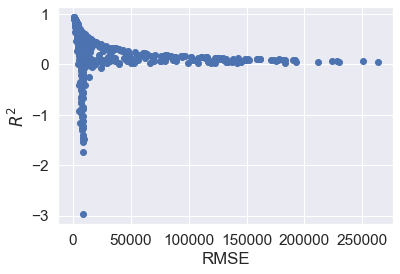

In [142]:
ut.plot_r2_rmse(df_model);

In [158]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.92)
xparams

rkb00     krb01     krb02     krb03     krb04     krb05     krb06  \
160 -3.020428 -2.236725 -1.224925 -1.272630 -1.147205 -1.209656 -4.513399   
229 -2.842853 -2.186408 -1.722820 -1.191432 -1.417365 -2.794170 -0.900776   
235 -1.413552 -1.987011 -1.066221 -1.085481 -0.605925 -5.066261 -0.927672   
281 -1.228902 -1.982714 -0.483874 -1.231502 -1.550072 -3.041696 -4.516509   
358 -1.837998 -0.445183 -0.776274 -0.797549 -0.284457 -3.818830 -3.095655   

        krb07      krb10      krb11     krb12      krb20      krb21  \
160 -6.201632  -9.308209  -8.852213 -6.002867  -7.167699  -6.003485   
229 -4.925163  -8.386451  -3.553267 -6.371414  -7.003466  -4.724027   
235 -6.514936  -7.372999 -10.845752 -5.975644 -12.776371 -10.956169   
281 -4.936394  -7.654494 -11.716975 -6.418226  -8.688609 -10.981354   
358 -4.608282 -11.344705  -4.867917 -6.666137  -6.446192  -8.194826   

         krb22     krb23     krb24     $R^2$         RMSE      MAPE  
160 -11.041036 -4.476610 -7.954878  0.923669   913.180338  0.422047  
229  -6.403621 -2.742268 -9.433602  0.943695   669.622526  0.718331  
235  -7.319800 -4.434007 -7.254323  0.929285   708.907590  0.326543  
281  -5.753648 -3.167889 -9.444233  0.940945   585.090776  0.357424  
358 -11.211981 -3.766570 -4.392303  0.922426  1032.206439  0.309415

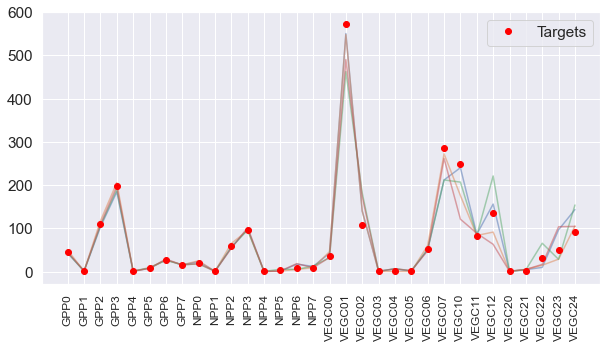

In [159]:
ut.spaghetti_match_plot(xparams, ymodel)

In [155]:
xparams

rkb00     krb01     krb02     krb03     krb04     krb05     krb06  \
160 -3.020428 -2.236725 -1.224925 -1.272630 -1.147205 -1.209656 -4.513399   
229 -2.842853 -2.186408 -1.722820 -1.191432 -1.417365 -2.794170 -0.900776   
235 -1.413552 -1.987011 -1.066221 -1.085481 -0.605925 -5.066261 -0.927672   
281 -1.228902 -1.982714 -0.483874 -1.231502 -1.550072 -3.041696 -4.516509   
358 -1.837998 -0.445183 -0.776274 -0.797549 -0.284457 -3.818830 -3.095655   

        krb07      krb10      krb11     krb12      krb20      krb21  \
160 -6.201632  -9.308209  -8.852213 -6.002867  -7.167699  -6.003485   
229 -4.925163  -8.386451  -3.553267 -6.371414  -7.003466  -4.724027   
235 -6.514936  -7.372999 -10.845752 -5.975644 -12.776371 -10.956169   
281 -4.936394  -7.654494 -11.716975 -6.418226  -8.688609 -10.981354   
358 -4.608282 -11.344705  -4.867917 -6.666137  -6.446192  -8.194826   

         krb22     krb23     krb24     $R^2$         RMSE      MAPE  
160 -11.041036 -4.476610 -7.954878  0.923669   913.180338  0.422047  
229  -6.403621 -2.742268 -9.433602  0.943695   669.622526  0.718331  
235  -7.319800 -4.434007 -7.254323  0.929285   708.907590  0.326543  
281  -5.753648 -3.167889 -9.444233  0.940945   585.090776  0.357424  
358 -11.211981 -3.766570 -4.392303  0.922426  1032.206439  0.309415

In [152]:
ymodel.describe()

GPP0      GPP1        GPP2        GPP3      GPP4      GPP5  \
count   5.000000  5.000000    5.000000    5.000000  5.000000  5.000000   
mean   45.137092  1.241695  109.205668  194.760332  0.979377  8.063657   
std     2.674379  0.113843    5.226334    8.185766  0.020881  0.687153   
min    42.827439  1.104024  103.106061  184.342514  0.951781  7.440859   
25%    42.999958  1.148039  106.191928  189.423259  0.968646  7.711697   
50%    44.942965  1.254575  108.687009  196.602434  0.976628  7.844877   
75%    45.470007  1.344171  111.165657  197.790176  0.997086  8.105074   
max    49.445091  1.357667  116.877687  205.643275  1.002746  9.215780   

            GPP6       GPP7       NPP0      NPP1  ...     VEGC06      VEGC07  \
count   5.000000   5.000000   5.000000  5.000000  ...   5.000000    5.000000   
mean   27.377463  15.588283  20.798569  0.708846  ...  52.654061  248.844644   
std     1.016577   0.223563   3.113304  0.119767  ...   4.545242   34.765849   
min    26.248618  15.331916  17.687453  0.561715  ...  48.316957  211.943431   
25%    26.923891  15.433667  18.398832  0.601122  ...  51.093123  211.970010   
50%    27.112011  15.621587  19.888726  0.753480  ...  51.263883  261.778180   
75%    27.639608  15.639532  23.036196  0.809727  ...  52.242418  272.371991   
max    28.963184  15.914712  24.981640  0.818184  ...  60.353922  286.159607   

           VEGC10     VEGC11      VEGC12    VEGC20    VEGC21     VEGC22  \
count    5.000000   5.000000    5.000000  5.000000  5.000000   5.000000   
mean   198.529974  84.894629  133.628624  0.658560  3.960574  27.532852   
std     51.927812   2.514492   61.116061  0.064282  1.713930  22.682045   
min    121.233283  82.451520   63.120251  0.579599  0.943347   9.717335   
25%    175.810994  83.569790   91.369156  0.608573  4.287555  14.737243   
50%    206.992824  83.572499  136.309302  0.662851  4.568621  16.689062   
75%    240.276437  86.242963  156.140524  0.718996  4.968933  30.940704   
max    248.336330  88.636375  221.203886  0.722781  5.034414  65.579917   

           VEGC23      VEGC24  
count    5.000000    5.000000  
mean    61.647750  120.035198  
std     36.472708   26.938524  
min     28.299621   92.656368  
25%     28.787004  104.564939  
50%     50.618118  105.499611  
75%     96.762641  143.434938  
max    103.771365  154.020135  

[8 rows x 32 columns]

In [154]:
xparams.describe()

rkb00     krb01     krb02     krb03     krb04     krb05     krb06  \
count  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000   
mean  -2.068747 -1.767608 -1.054823 -1.115719 -1.001005 -3.186123 -2.790802   
std    0.820488  0.748111  0.468737  0.190988  0.539846  1.415640  1.808438   
min   -3.020428 -2.236725 -1.722820 -1.272630 -1.550072 -5.066261 -4.516509   
25%   -2.842853 -2.186408 -1.224925 -1.231502 -1.417365 -3.818830 -4.513399   
50%   -1.837998 -1.987011 -1.066221 -1.191432 -1.147205 -3.041696 -3.095655   
75%   -1.413552 -1.982714 -0.776274 -1.085481 -0.605925 -2.794170 -0.927672   
max   -1.228902 -0.445183 -0.483874 -0.797549 -0.284457 -1.209656 -0.900776   

          krb07      krb10      krb11     krb12      krb20      krb21  \
count  5.000000   5.000000   5.000000  5.000000   5.000000   5.000000   
mean  -5.437281  -8.813372  -7.967225 -6.286858  -8.416468  -8.171972   
std    0.858191   1.600972   3.613118  0.294009   2.574918   2.838819   
min   -6.514936 -11.344705 -11.716975 -6.666137 -12.776371 -10.981354   
25%   -6.201632  -9.308209 -10.845752 -6.418226  -8.688609 -10.956169   
50%   -4.936394  -8.386451  -8.852213 -6.371414  -7.167699  -8.194826   
75%   -4.925163  -7.654494  -4.867917 -6.002867  -7.003466  -6.003485   
max   -4.608282  -7.372999  -3.553267 -5.975644  -6.446192  -4.724027   

           krb22     krb23     krb24     $R^2$         RMSE      MAPE  
count   5.000000  5.000000  5.000000  5.000000     5.000000  5.000000  
mean   -8.346017 -3.717469 -7.695868  0.932004   781.801534  0.426752  
std     2.599196  0.765700  2.076782  0.009814   184.767277  0.168565  
min   -11.211981 -4.476610 -9.444233  0.922426   585.090776  0.309415  
25%   -11.041036 -4.434007 -9.433602  0.923669   669.622526  0.326543  
50%    -7.319800 -3.766570 -7.954878  0.929285   708.907590  0.357424  
75%    -6.403621 -3.167889 -7.254323  0.940945   913.180338  0.422047  
max    -5.753648 -2.742268 -4.392303  0.943695  1032.206439  0.718331

## Cfall

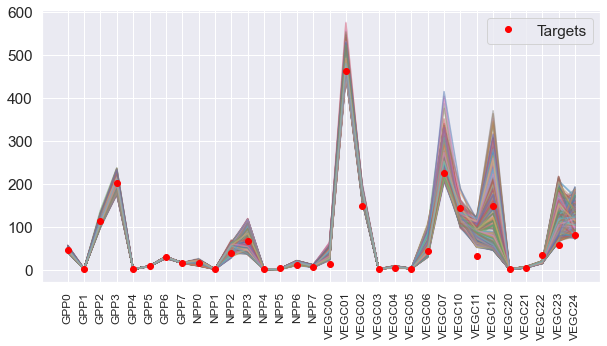

In [161]:
path='TK/sa-cfall-TK-EJ-075/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)
param_name = ['cfall00','cfall01','cfall02','cfall03','cfall04','cfall05','cfall06','cfall07', \
              'cfall10','cfall11','cfall12', \
              'cfall20','cfall21','cfall22','cfall23','cfall24']
df_param.columns = param_name
model_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7', \
              'NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07', \
              'VEGC10','VEGC11','VEGC12', \
              'VEGC20','VEGC21','VEGC22','VEGC23','VEGC24']
df_model.columns = model_name
ut.spaghetti_match_plot(df_param,df_model)

In [170]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.965)
xparams

cfall00   cfall01   cfall02   cfall03   cfall04   cfall05   cfall06  \
9    0.057810  0.038098  0.075085  0.078513  0.020977  0.003061  0.018712   
99   0.036078  0.112793  0.119404  0.089013  0.028626  0.010082  0.016800   
125  0.027836  0.092592  0.096572  0.075394  0.061559  0.002850  0.025414   
144  0.071936  0.033567  0.046275  0.095175  0.040347  0.005896  0.020620   
261  0.064230  0.110388  0.074686  0.078441  0.066527  0.006828  0.025642   
380  0.056421  0.122024  0.107199  0.082333  0.068568  0.008693  0.026181   

      cfall07   cfall10   cfall11   cfall12   cfall20   cfall21   cfall22  \
9    0.007993  0.000086  0.000043  0.000302  0.000069  0.000174  0.000078   
99   0.009539  0.000039  0.000174  0.000290  0.000028  0.000086  0.000130   
125  0.006639  0.000073  0.000221  0.000249  0.000039  0.000212  0.000166   
144  0.011464  0.000049  0.000198  0.000304  0.000074  0.000071  0.000179   
261  0.011383  0.000018  0.000270  0.000342  0.000083  0.000292  0.000130   
380  0.007263  0.000037  0.000164  0.000284  0.000051  0.000251  0.000231   

      cfall23   cfall24     $R^2$        RMSE      MAPE  
9    0.000210  0.000353  0.976639  217.099828  0.369518  
99   0.000468  0.000305  0.965304  368.742811  0.297167  
125  0.000415  0.000168  0.970195  298.080568  0.368502  
144  0.000390  0.000204  0.970258  300.041636  0.327434  
261  0.000317  0.000142  0.970158  330.707105  0.294138  
380  0.000498  0.000472  0.968152  326.515837  0.296684

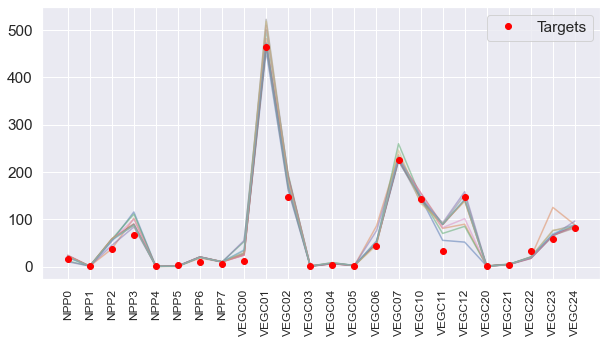

In [188]:
path='TK/ca-cfall-NPPVEGC-TK-EJ-075/' #10% variance
params='param_cfall-tk.csv'
model='out_cfall-tk.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
param_name = ['cfall00','cfall01','cfall02','cfall03','cfall04','cfall05','cfall06','cfall07', \
              'cfall10','cfall11','cfall12', \
              'cfall20','cfall21','cfall22','cfall23','cfall24']
df_param.columns = param_name
model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07', \
              'VEGC10','VEGC11','VEGC12', \
              'VEGC20','VEGC21','VEGC22','VEGC23','VEGC24']
df_model.columns = model_name
#print(df_param.shape,df_model.shape)
ut.spaghetti_match_plot(df_param,df_model)

In [194]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.97)
xparams

cfall00   cfall01   cfall02   cfall03   cfall04   cfall05   cfall06  \
3  0.076768  0.023810  0.092954  0.082582  0.023577  0.007739  0.026103   
5  0.065757  0.059299  0.090494  0.080823  0.062220  0.001770  0.026085   
9  0.043384  0.058851  0.080992  0.079931  0.077272  0.001999  0.023859   

    cfall07   cfall10   cfall11   cfall12   cfall20   cfall21   cfall22  \
3  0.009607  0.000086  0.000287  0.000378  0.000014  0.000051  0.000056   
5  0.010509  0.000083  0.000153  0.000379  0.000081  0.000082  0.000110   
9  0.009228  0.000083  0.000092  0.000358  0.000067  0.000102  0.000100   

    cfall23   cfall24     $R^2$        RMSE      MAPE  
3  0.000379  0.000446  0.973589  288.404473  0.363944  
5  0.000302  0.000404  0.979312  218.279575  0.569911  
9  0.000242  0.000388  0.977113  247.416691  0.553843

### Perfecto

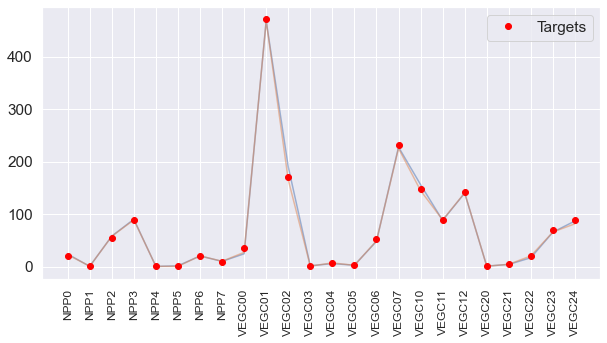

In [195]:
ut.spaghetti_match_plot(xparams, ymodel)

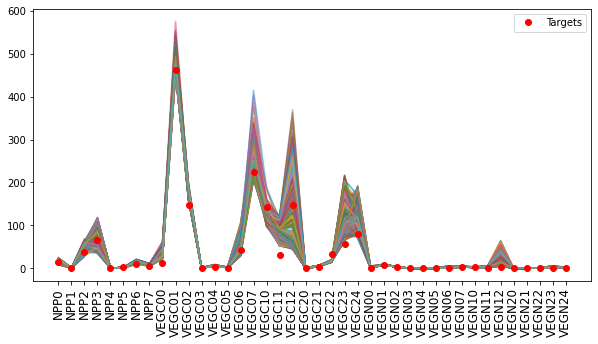

In [9]:
# nfall did not help much 
# this setup has VEGN included
path='TK/sa-cfall-NPPVEGCN-TK-EJ-075/' #10% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)
param_name = ['cfall00','cfall01','cfall02','cfall03','cfall04','cfall05','cfall06','cfall07', \
              'cfall10','cfall11','cfall12', \
              'cfall20','cfall21','cfall22','cfall23','cfall24']
df_param.columns = param_name
model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07', \
              'VEGC10','VEGC11','VEGC12', \
              'VEGC20','VEGC21','VEGC22','VEGC23','VEGC24',\
              'VEGN00','VEGN01','VEGN02','VEGN03','VEGN04','VEGN05','VEGN06','VEGN07', \
              'VEGN10','VEGN11','VEGN12', \
              'VEGN20','VEGN21','VEGN22','VEGN23','VEGN24']
df_model.columns = model_name
#print(df_param.shape,df_model.shape)
ut.spaghetti_match_plot(df_param,df_model)

In [14]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.97)
xparams

cfall00   cfall01   cfall02   cfall03   cfall04   cfall05   cfall06  \
9    0.057810  0.038098  0.075085  0.078513  0.020977  0.003061  0.018712   
125  0.027836  0.092592  0.096572  0.075394  0.061559  0.002850  0.025414   
144  0.071936  0.033567  0.046275  0.095175  0.040347  0.005896  0.020620   
261  0.064230  0.110388  0.074686  0.078441  0.066527  0.006828  0.025642   

      cfall07   cfall10   cfall11   cfall12   cfall20   cfall21   cfall22  \
9    0.007993  0.000086  0.000043  0.000302  0.000069  0.000174  0.000078   
125  0.006639  0.000073  0.000221  0.000249  0.000039  0.000212  0.000166   
144  0.011464  0.000049  0.000198  0.000304  0.000074  0.000071  0.000179   
261  0.011383  0.000018  0.000270  0.000342  0.000083  0.000292  0.000130   

      cfall23   cfall24     $R^2$        RMSE      MAPE  
9    0.000210  0.000353  0.976620  178.788852  0.465408  
125  0.000415  0.000168  0.970622  242.408489  0.451862  
144  0.000390  0.000204  0.970867  240.825329  0.422784  
261  0.000317  0.000142  0.970412  268.807884  0.378889

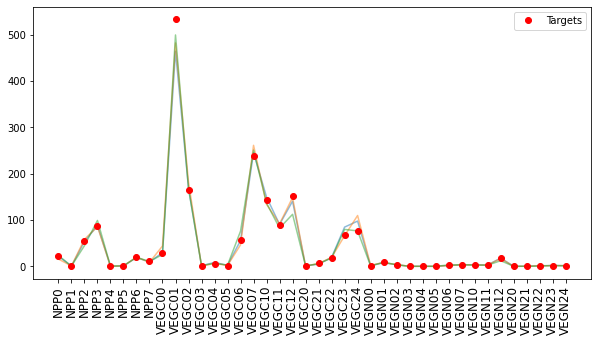

In [15]:
ut.spaghetti_match_plot(xparams, ymodel)

In [16]:
ut.spaghetti_match_plot?

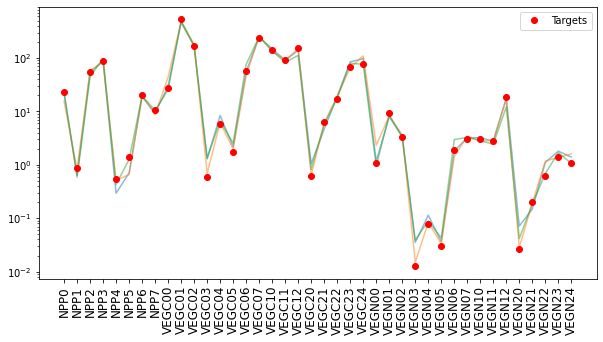

In [17]:
ut.spaghetti_match_plot(xparams, ymodel,True)

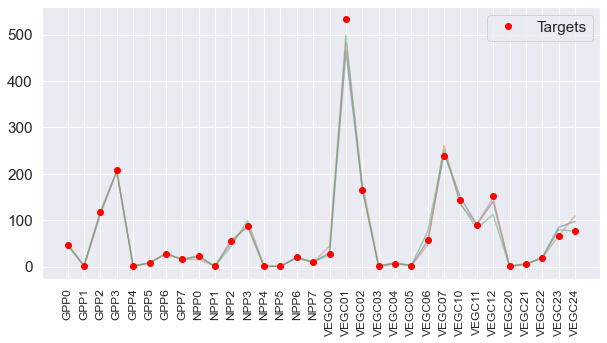

In [169]:
ut.spaghetti_match_plot(xparams, ymodel)

In [171]:
xparams.describe()

cfall00   cfall01   cfall02   cfall03   cfall04   cfall05   cfall06  \
count  6.000000  6.000000  6.000000  6.000000  6.000000  6.000000  6.000000   
mean   0.052385  0.084910  0.086537  0.083145  0.047767  0.006235  0.022228   
std    0.016952  0.039219  0.026459  0.007529  0.020562  0.002927  0.004046   
min    0.027836  0.033567  0.046275  0.075394  0.020977  0.002850  0.016800   
25%    0.041164  0.051721  0.074785  0.078459  0.031556  0.003770  0.019189   
50%    0.057115  0.101490  0.085829  0.080423  0.050953  0.006362  0.023017   
75%    0.062625  0.112192  0.104543  0.087343  0.065285  0.008226  0.025585   
max    0.071936  0.122024  0.119404  0.095175  0.068568  0.010082  0.026181   

        cfall07   cfall10   cfall11   cfall12   cfall20   cfall21   cfall22  \
count  6.000000  6.000000  6.000000  6.000000  6.000000  6.000000  6.000000   
mean   0.009047  0.000050  0.000178  0.000295  0.000057  0.000181  0.000152   
std    0.002080  0.000025  0.000076  0.000030  0.000022  0.000089  0.000052   
min    0.006639  0.000018  0.000043  0.000249  0.000028  0.000071  0.000078   
25%    0.007446  0.000037  0.000166  0.000285  0.000042  0.000108  0.000130   
50%    0.008766  0.000044  0.000186  0.000296  0.000060  0.000193  0.000148   
75%    0.010922  0.000067  0.000216  0.000303  0.000073  0.000241  0.000176   
max    0.011464  0.000086  0.000270  0.000342  0.000083  0.000292  0.000231   

        cfall23   cfall24     $R^2$        RMSE      MAPE  
count  6.000000  6.000000  6.000000    6.000000  6.000000  
mean   0.000383  0.000274  0.970118  306.864631  0.325574  
std    0.000106  0.000127  0.003731   50.921460  0.035797  
min    0.000210  0.000142  0.965304  217.099828  0.294138  
25%    0.000335  0.000177  0.968653  298.570835  0.296804  
50%    0.000403  0.000254  0.970176  313.278737  0.312300  
75%    0.000455  0.000341  0.970242  329.659288  0.358235  
max    0.000498  0.000472  0.976639  368.742811  0.369518

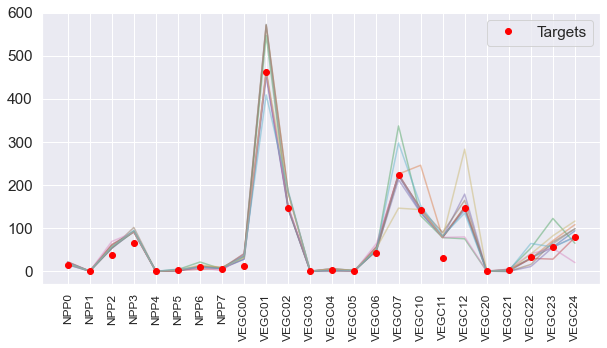

In [174]:
path='TK/ca-krb-TK-EJ-075/' #10% variance
params='param_krb-tk.csv'
model='out_krb-tk.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
param_name = ['rkb00','krb01','krb02','krb03','krb04','krb05','krb06','krb07', \
              'krb10','krb11','krb12', \
              'krb20','krb21','krb22','krb23','krb24']
df_param.columns = param_name
model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07', \
              'VEGC10','VEGC11','VEGC12', \
              'VEGC20','VEGC21','VEGC22','VEGC23','VEGC24']
df_model.columns = model_name
#print(df_param.shape,df_model.shape)
ut.spaghetti_match_plot(df_param,df_model)

In [176]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.94)
xparams

rkb00     krb01     krb02     krb03     krb04     krb05     krb06  \
0 -0.647138 -0.672678 -1.669654 -0.330950 -1.161346 -3.815424 -3.284173   
3 -2.591620 -1.183786 -1.595265 -0.257828 -1.130892 -3.778588 -0.785051   
4 -0.624482 -0.416139 -0.250342 -0.361746 -1.051576 -1.747649 -3.245654   
5 -1.692549 -1.025960 -0.435227 -1.743482 -1.603492 -2.967557 -3.600869   
6 -1.539217 -0.856990 -1.733244 -0.469042 -0.478860 -4.085000 -3.115471   
7 -2.489922 -0.917561 -0.517092 -0.404541 -0.861209 -3.821170 -3.485596   

      krb07      krb10     krb11     krb12      krb20      krb21     krb22  \
0 -4.658292  -7.314558 -9.089810 -6.027037  -7.274488 -11.516837 -5.967707   
3 -4.302538  -7.194557 -6.544169 -5.932580  -7.235475  -2.356090 -5.933345   
4 -4.338933  -7.210710 -3.676046 -5.932189  -7.238487 -11.497263 -5.938485   
5 -4.757243 -13.448876 -6.203744 -6.049836 -12.541701 -10.526306 -6.115093   
6 -1.659548  -7.050258 -8.503286 -5.757149  -7.146612  -3.182013 -5.778763   
7 -4.766818 -13.352718 -8.124675 -6.064147  -7.247070  -8.217012 -6.094516   

      krb23      krb24     $R^2$        RMSE      MAPE  
0 -4.048189  -1.824901  0.982681  175.667038  1.224001  
3 -3.680904  -5.815569  0.978209  225.786248  1.511888  
4 -4.151593  -2.955756  0.977972  222.887500  1.059492  
5 -3.875138  -2.870916  0.944860  818.089423  0.772211  
6 -1.275364 -10.324729  0.944944  555.711101  0.929666  
7 -4.087744 -10.177233  0.951563  694.396022  0.280217

## nfall

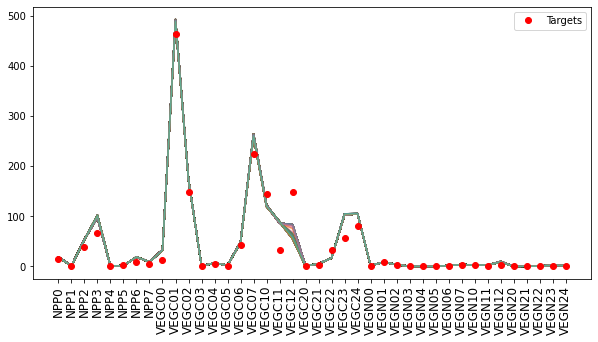

In [2]:
path='TK/sa-nfall-TK-EJ-075/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)
param_name = ['nfall00','nfall01','nfall02','nfall03','nfall04','nfall05','nfall06','nfall07', \
              'nfall10','nfall11','nfall12', \
              'nfall20','nfall21','nfall22','nfall23','nfall24']
df_param.columns = param_name
model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07', \
              'VEGC10','VEGC11','VEGC12', \
              'VEGC20','VEGC21','VEGC22','VEGC23','VEGC24',\
              'VEGN00','VEGN01','VEGN02','VEGN03','VEGN04','VEGN05','VEGN06','VEGN07', \
              'VEGN10','VEGN11','VEGN12', \
              'VEGN20','VEGN21','VEGN22','VEGN23','VEGN24'
             ]
df_model.columns = model_name
ut.spaghetti_match_plot(df_param,df_model)

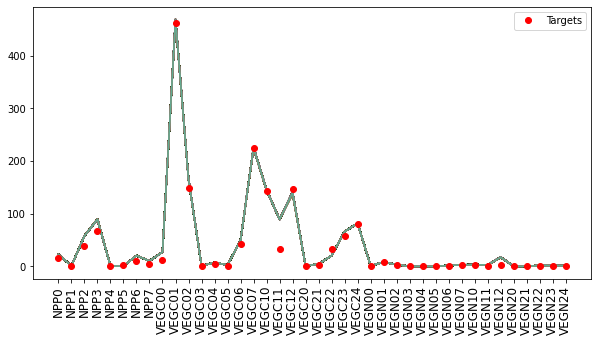

In [3]:
path='TK/sa-nfall-NPPVEGCN-TK-EJ-075/'
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)
param_name = ['nfall00','nfall01','nfall02','nfall03','nfall04','nfall05','nfall06','nfall07', \
              'nfall10','nfall11','nfall12', \
              'nfall20','nfall21','nfall22','nfall23','nfall24']
df_param.columns = param_name
model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07', \
              'VEGC10','VEGC11','VEGC12', \
              'VEGC20','VEGC21','VEGC22','VEGC23','VEGC24',\
              'VEGN00','VEGN01','VEGN02','VEGN03','VEGN04','VEGN05','VEGN06','VEGN07', \
              'VEGN10','VEGN11','VEGN12', \
              'VEGN20','VEGN21','VEGN22','VEGN23','VEGN24'
             ]
df_model.columns = model_name
ut.spaghetti_match_plot(df_param,df_model)

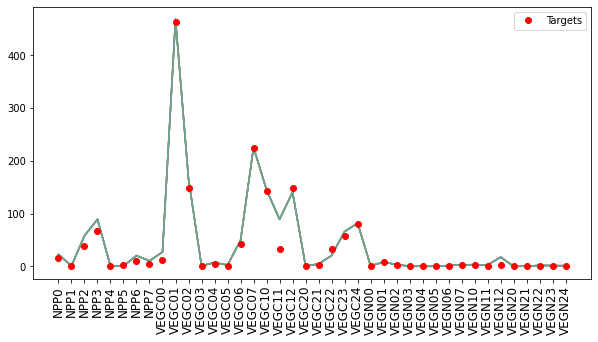

In [5]:
path='TK/ca-nfall-NPPVEGCN-TK-EJ-075/' #10% variance
params='param_nfall-tk.csv'
model='out_nfall-tk.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
param_name = ['nfall00','nfall01','nfall02','nfall03','nfall04','nfall05','nfall06','nfall07', \
              'nfall10','nfall11','nfall12', \
              'nfall20','nfall21','nfall22','nfall23','nfall24']
df_param.columns = param_name
model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07', \
              'VEGC10','VEGC11','VEGC12', \
              'VEGC20','VEGC21','VEGC22','VEGC23','VEGC24',\
              'VEGN00','VEGN01','VEGN02','VEGN03','VEGN04','VEGN05','VEGN06','VEGN07', \
              'VEGN10','VEGN11','VEGN12', \
              'VEGN20','VEGN21','VEGN22','VEGN23','VEGN24'
             ]
df_model.columns = model_name
ut.spaghetti_match_plot(df_param,df_model)

## SoilC

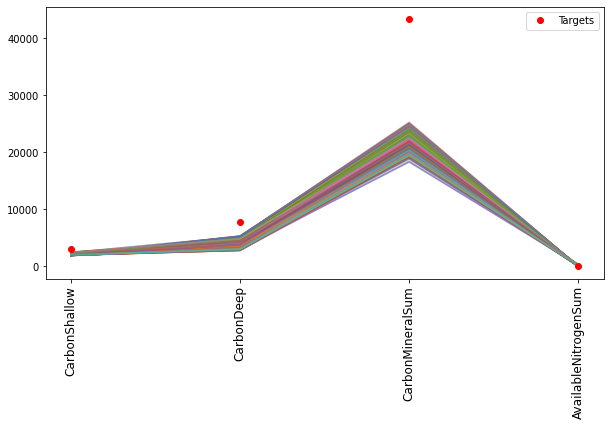

In [39]:
path='TK/soilC-tk-EJ-075/' #75% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

output_name = ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'AvailableNitrogenSum']
df_model.columns = output_name

output_name = ['micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr']
df_param.columns = output_name
df_model.head()
ut.spaghetti_match_plot(df_param,df_model)

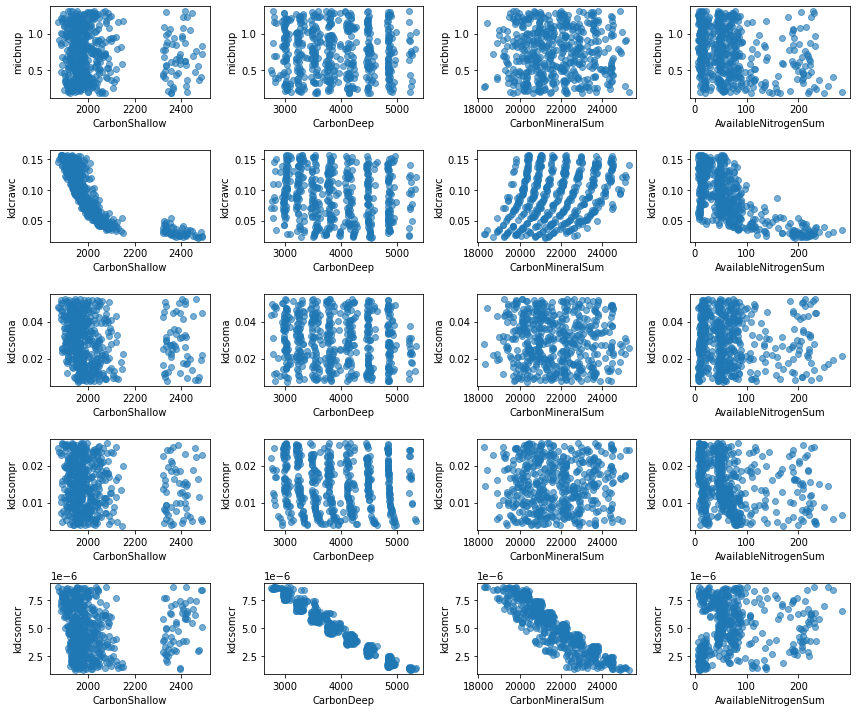

In [40]:
[n,m]=df_param.shape
#m=8
n=4
fig, axs = plt.subplots(nrows=m, ncols=n, figsize=(12,10))
for i in range(m):
    for j in range(n):
        axs[i,j].scatter(df_model.iloc[0:500,j],df_param.iloc[0:500,i],alpha=0.6)
        axs[i,j].set_xlabel(df_model.columns[j])
        axs[i,j].set_ylabel(df_param.columns[i])
fig.tight_layout() 

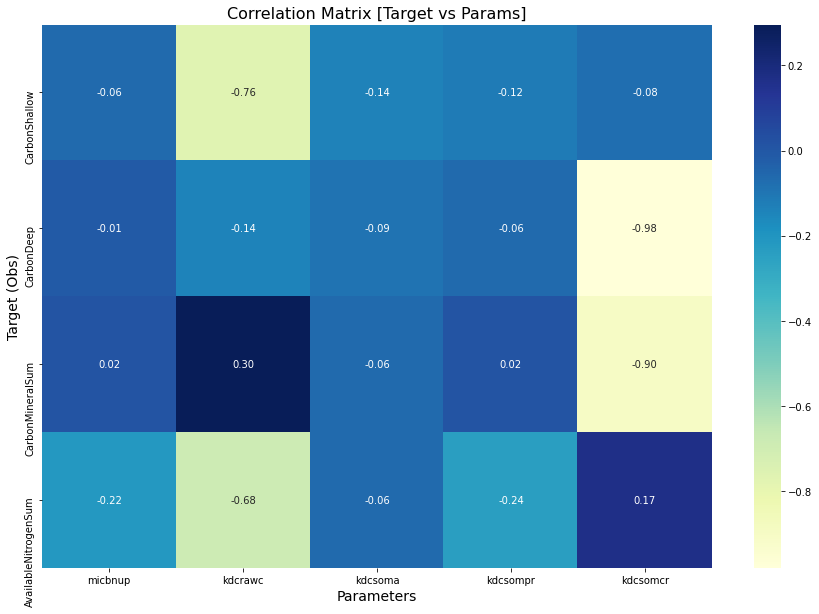

In [41]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

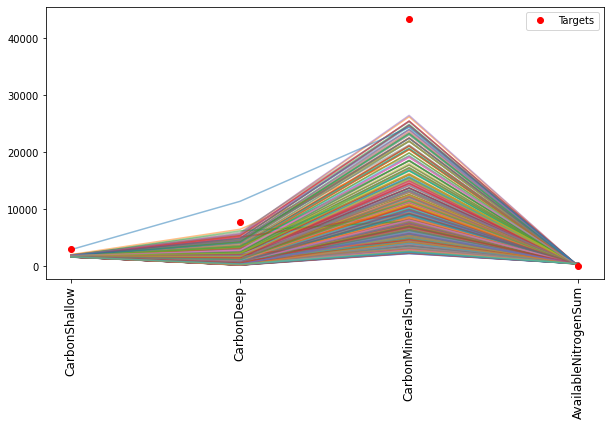

In [28]:
path='TK/soilC-tk-EJ-bound/' #75% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

output_name = ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'AvailableNitrogenSum']
df_model.columns = output_name

output_name = ['micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr']
df_param.columns = output_name
df_model.head()
ut.spaghetti_match_plot(df_param,df_model)

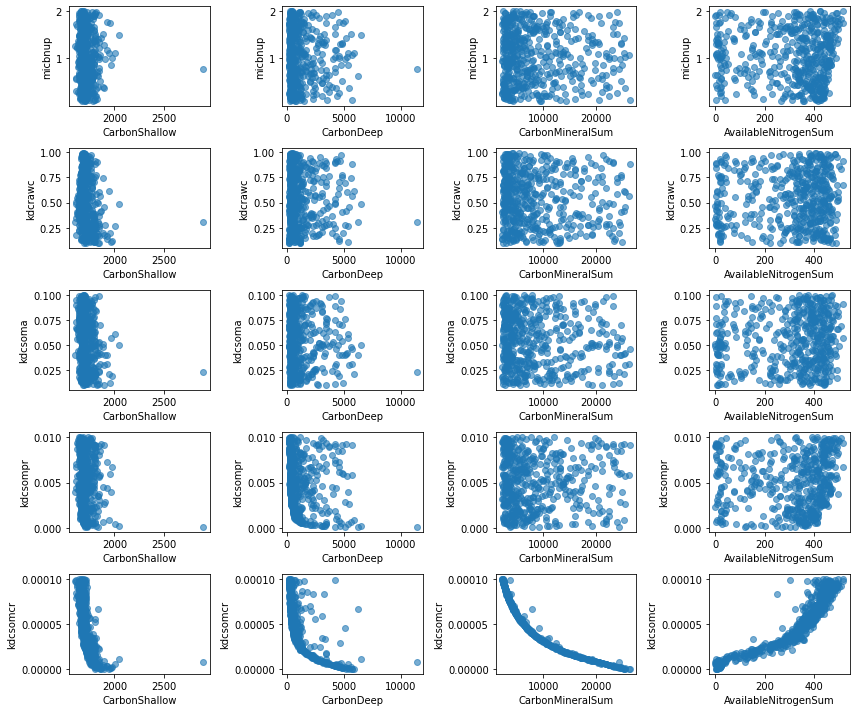

In [38]:
[n,m]=df_param.shape
#m=8
n=4
fig, axs = plt.subplots(nrows=m, ncols=n, figsize=(12,10))
for i in range(m):
    for j in range(n):
        axs[i,j].scatter(df_model.iloc[0:500,j],df_param.iloc[0:500,i],alpha=0.6)
        axs[i,j].set_xlabel(df_model.columns[j])
        axs[i,j].set_ylabel(df_param.columns[i])
fig.tight_layout() 

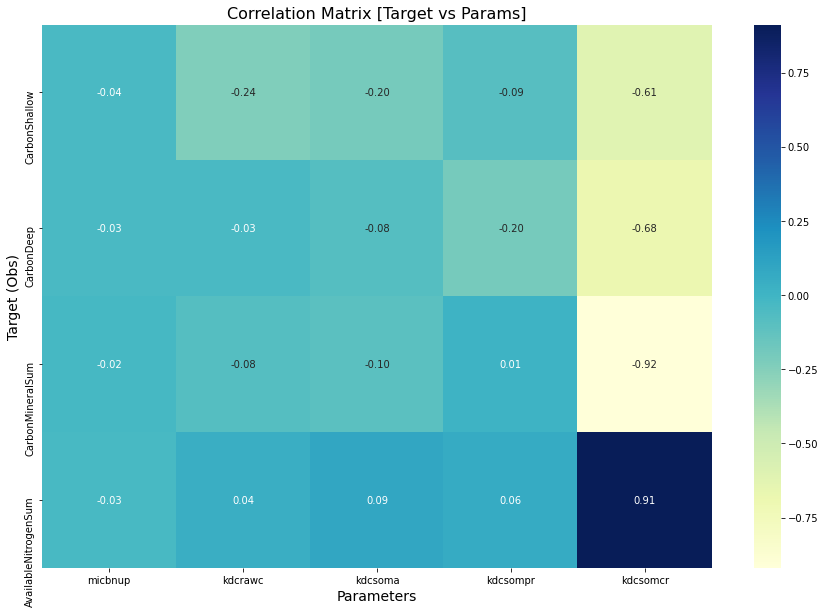

In [33]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

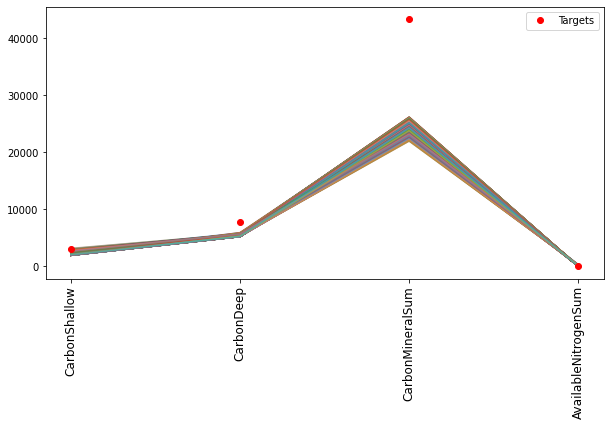

In [77]:
path='TK/soilC-tk-EJ-09-old/' #75% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

output_name = ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'AvailableNitrogenSum']
df_model.columns = output_name

output_name = ['micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr']
df_param.columns = output_name
df_model.head()
ut.spaghetti_match_plot(df_param,df_model)

In [9]:
df_model.tail()

CarbonShallow   CarbonDeep  CarbonMineralSum  AvailableNitrogenSum
496    2142.592910  5605.508838      25978.906896             89.859315
497    1942.752025  5639.821645      25907.924193             29.586875
498    1863.108277  5666.982751      26623.607478             65.781509
499    1835.865657  5675.556276      26656.544318             21.443185
500    3079.000000  7703.000000      43404.000000              8.958000

In [8]:
!cat TK/soilC-tk-EJ-09-old/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[0.07499999999999996, 1.425]",0.75,5,None
kdcrawc,"[0.008999999999999994, 0.17099999999999999]",0.09,5,None
kdcsoma,"[0.002999999999999999, 0.056999999999999995]",0.03,5,None
kdcsompr,"[0.0019999999999999983, 0.038000000000000006]",0.02,5,None
kdcsomcr,"[5e-08, 9.5e-07]",5e-07,5,None


In [7]:
!cat TK/soilC-tk-EJ-095_low_kc/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[7.299999493781684e-11, 0.291999999927]",0.146,5,None
kdcrawc,"[4.1199998968011187e-10, 1.647999999588]",0.824,5,None
kdcsoma,"[1.110000147352963e-10, 0.44399999988899996]",0.222,5,None
kdcsompr,"[4.99999991225835e-15, 1.9999999995000003e-05]",1e-05,5,None
kdcsomcr,"[5.000000487562466e-20, 1.9999999995000002e-10]",1e-10,5,None


In [6]:
cat TK/soilC-tk-EJ-095_low_kc_increse_deep/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[7.299999493781684e-11, 0.291999999927]",0.146,5,None
kdcrawc,"[4.1199998968011187e-10, 1.647999999588]",0.824,5,None
kdcsoma,"[1.110000147352963e-10, 0.44399999988899996]",0.222,5,None
kdcsompr,"[1.7500001447956492e-11, 0.0699999999825]",0.035,5,None
kdcsomcr,"[4.999999841327613e-21, 1.9999999995e-11]",1e-11,5,None


In [20]:
cat TK/soilC-tk-EJ-095_case1/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[3.750000310276391e-10, 1.499999999625]",0.75,5,None
kdcrawc,"[4.5000003723316695e-11, 0.179999999955]",0.09,5,None
kdcsoma,"[1.5000001241105565e-11, 0.059999999985]",0.03,5,None
kdcsompr,"[1.7499998845871279e-13, 0.000699999999825]",0.00035,5,None
kdcsomcr,"[5.000000487562466e-20, 1.9999999995000002e-10]",1e-10,5,None


In [22]:
cat TK/soilC-tk-EJ-095_case2/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[3.750000310276391e-10, 1.499999999625]",0.75,5,None
kdcrawc,"[4.5000003723316695e-11, 0.179999999955]",0.09,5,None
kdcsoma,"[1.5000001241105565e-11, 0.059999999985]",0.03,5,None
kdcsompr,"[1.7500003182679968e-12, 0.00699999999825]",0.0035,5,None
kdcsomcr,"[4.999999604669341e-25, 1.9999999995000004e-15]",1e-15,5,None


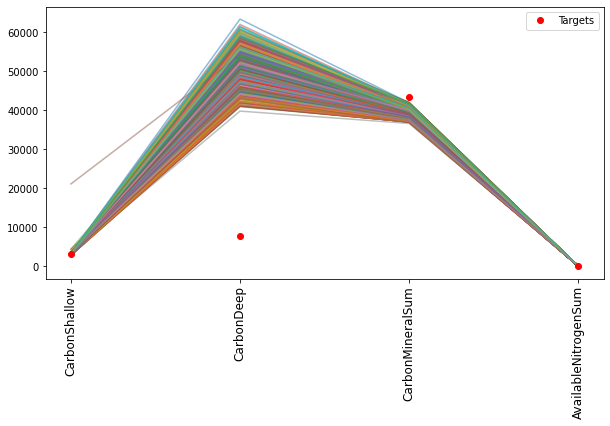

In [2]:
path='TK/soilC-tk-EJ-095_low_kc/' #75% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

output_name = ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'AvailableNitrogenSum']
df_model.columns = output_name

output_name = ['micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr']
df_param.columns = output_name
df_model.head()
ut.spaghetti_match_plot(df_param,df_model)

In [12]:
np.log(1e-10)

-23.025850929940457

In [14]:
1e-10-1e-10*0.95

5.0000000000000086e-12

In [16]:
1e-10+1e-10*0.95

1.95e-10

In [15]:
np.log(1e-10-1e-10*0.95)

-26.021583203494448

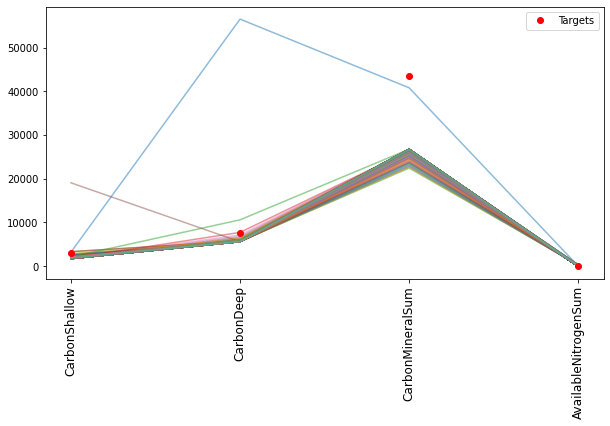

In [17]:
path='TK/soilC-tk-EJ-095_low_kc_increse_deep/' #75% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

output_name = ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'AvailableNitrogenSum']
df_model.columns = output_name

output_name = ['micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr']
df_param.columns = output_name
df_model.head()
ut.spaghetti_match_plot(df_param,df_model)

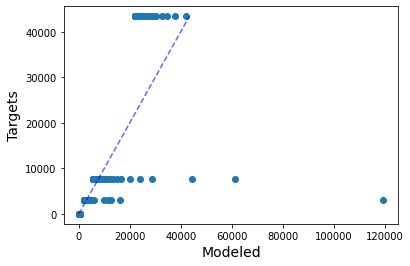

In [23]:
ut.one_to_one_match_plot(df_model)

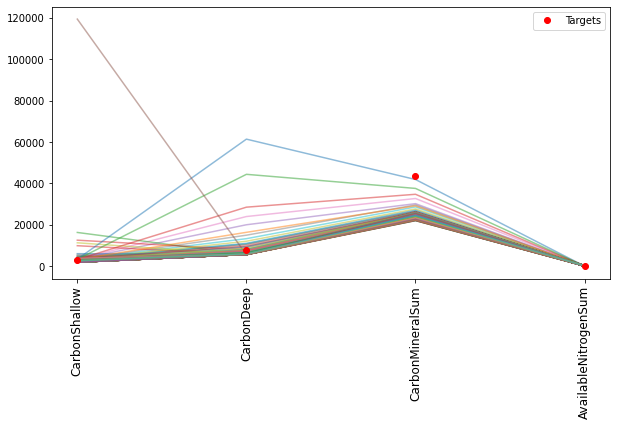

In [21]:
path='TK/soilC-tk-EJ-095_case2/' #75% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

output_name = ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'AvailableNitrogenSum']
df_model.columns = output_name

output_name = ['micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr']
df_param.columns = output_name
df_model.head()
ut.spaghetti_match_plot(df_param,df_model)

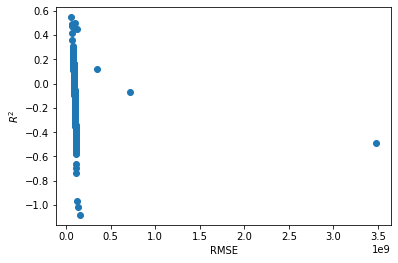

In [24]:
ut.plot_r2_rmse(df_model);

In [27]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.45)
ymodel

CarbonShallow    CarbonDeep  CarbonMineralSum  AvailableNitrogenSum
19     3267.896996  13307.873800      28648.069293            230.353265
57     3252.724656  14988.952852      29632.124033            212.149773
74     3246.887362  20030.562985      30236.741553            141.060213
136    3259.837775  24006.294323      32723.312163            155.200520
311    3278.526564  16377.896624      29171.345421            200.322209

In [28]:
xparams

micbnup   kdcrawc   kdcsoma  kdcsompr      kdcsomcr     $R^2$  \
19   0.301435  0.093982  0.027161  0.000100  1.182662e-15  0.493444   
57   1.110462  0.153513  0.019271  0.000085  1.660277e-15  0.546376   
74   0.949377  0.163463  0.050899  0.000062  5.751006e-16  0.463338   
136  0.852049  0.088155  0.043035  0.000046  1.968771e-15  0.495730   
311  1.104487  0.077709  0.026515  0.000078  2.319830e-16  0.474725   

             RMSE      MAPE  
19   6.230920e+07  0.488790  
57   6.070529e+07  0.490508  
74   8.134779e+07  0.509778  
136  9.498215e+07  0.500819  
311  6.947468e+07  0.508428

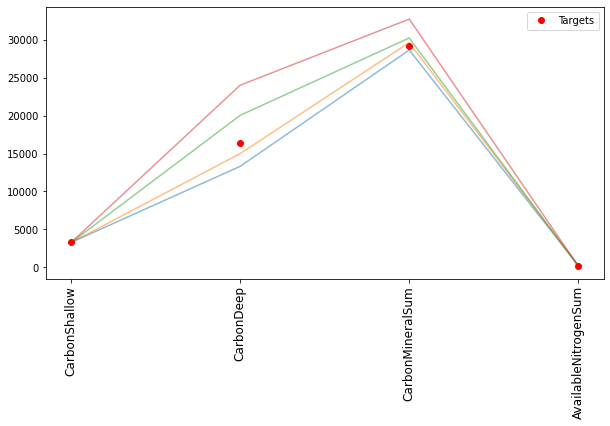

In [29]:
ut.spaghetti_match_plot(xparams, ymodel)

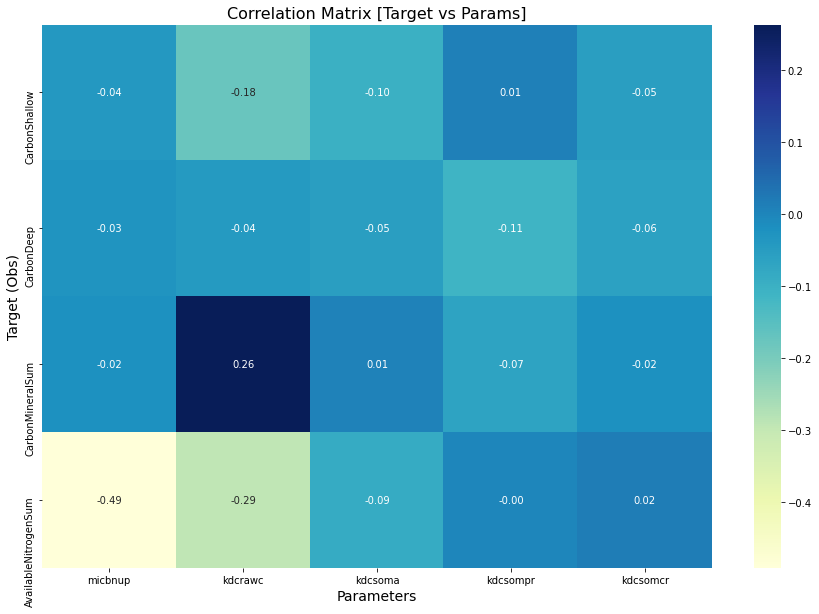

In [18]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

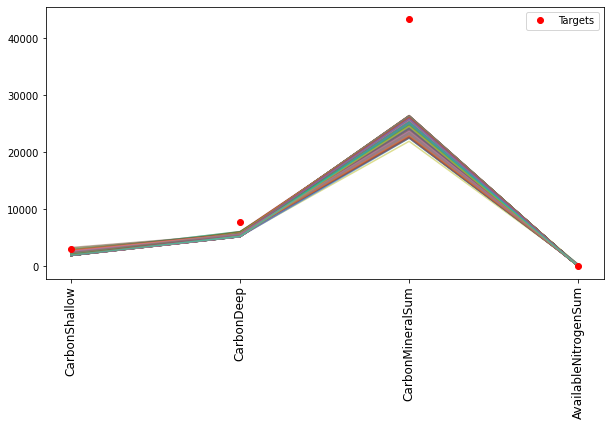

In [78]:
path='TK/soilC-tk-EJ-09/' #75% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

output_name = ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'AvailableNitrogenSum']
df_model.columns = output_name

output_name = ['micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr']
df_param.columns = output_name
df_model.head()
ut.spaghetti_match_plot(df_param,df_model)

libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [50]:
cat TK/soilC-tk-EJ-09/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[0.07499999999999996, 1.425]",0.75,5,None
kdcrawc,"[0.008999999999999994, 0.17099999999999999]",0.09,5,None
kdcsoma,"[0.002999999999999999, 0.056999999999999995]",0.03,5,None
kdcsompr,"[0.0014999999999999996, 0.028499999999999998]",0.015,5,None
kdcsomcr,"[5.000000000000003e-07, 9.5e-06]",5e-06,5,None


In [45]:
df_model.iloc[:500,:].describe()

CarbonShallow   CarbonDeep  CarbonMineralSum  AvailableNitrogenSum
count     500.000000   500.000000        500.000000            500.000000
mean     2093.781434  3964.882359      21640.394303             86.541960
std       257.969912   785.538442       1787.322239             81.279819
min      1848.002800  2739.188725      17656.120224              3.869228
25%      1938.291069  3274.977322      20287.070453             22.468397
50%      1987.946830  3852.289525      21472.496817             54.954405
75%      2086.636142  4565.372720      22965.433742            114.127377
max      3112.198924  5585.090493      25340.583921            368.053571

In [44]:
df_model.shape

(501, 4)

In [47]:
df_model.iloc[-1,:]

CarbonShallow            3079.000
CarbonDeep               7703.000
CarbonMineralSum        43404.000
AvailableNitrogenSum        8.958
Name: 500, dtype: float64

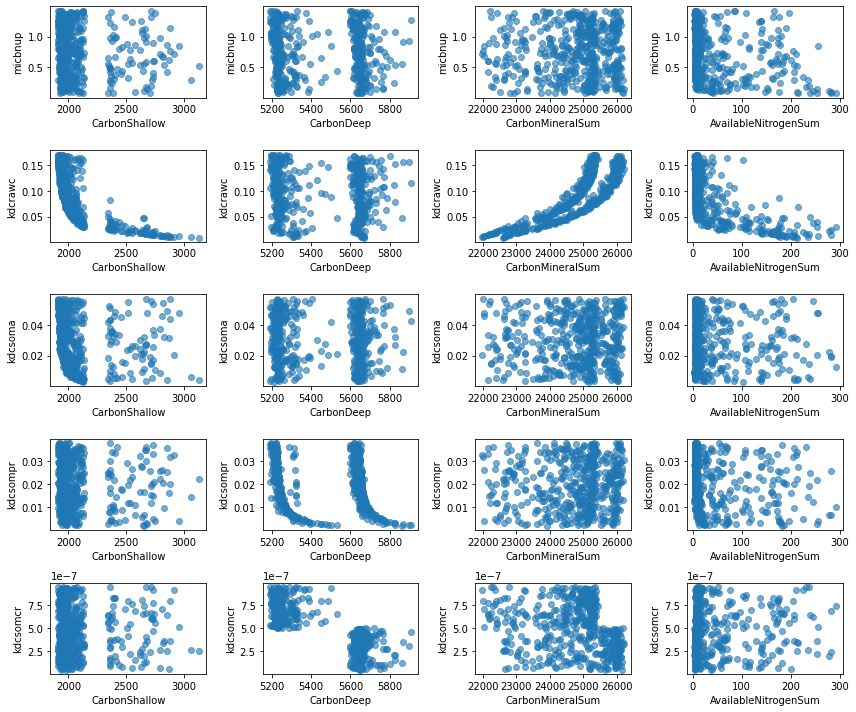

In [52]:
[n,m]=df_param.shape
#m=8
n=4
fig, axs = plt.subplots(nrows=m, ncols=n, figsize=(12,10))
for i in range(m):
    for j in range(n):
        axs[i,j].scatter(df_model.iloc[0:500,j],df_param.iloc[0:500,i],alpha=0.6)
        axs[i,j].set_xlabel(df_model.columns[j])
        axs[i,j].set_ylabel(df_param.columns[i])
fig.tight_layout() 

In [82]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.34)
xparams

micbnup   kdcrawc   kdcsoma  kdcsompr      kdcsomcr     $R^2$  \
43   0.114431  0.241235  0.069886  0.038823  1.942001e-07  0.345784   
296  0.400727  0.275434  0.067313  0.042527  4.547539e-07  0.340991   
327  0.126353  0.230468  0.072198  0.034077  1.806703e-07  0.343904   

             RMSE      MAPE  
43   7.309046e+07  0.522499  
296  7.345389e+07  0.605548  
327  7.321030e+07  0.529765

In [83]:
cat TK/soilC-tk-EJ-09/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[0.03750000000000009, 1.4625]",0.75,5,None
kdcrawc,"[0.007500000000000007, 0.2925]",0.15,5,None
kdcsoma,"[0.0020000000000000018, 0.078]",0.04,5,None
kdcsompr,"[0.0012500000000000011, 0.04875]",0.025,5,None
kdcsomcr,"[1.5000000000000015e-08, 5.849999999999999e-07]",3e-07,5,None


In [57]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.3)
xparams

micbnup   kdcrawc   kdcsoma  kdcsompr      kdcsomcr     $R^2$  \
14   0.093008  0.151303  0.024905  0.034905  5.122608e-08  0.304892   
43   0.147882  0.141860  0.051235  0.030477  3.329475e-07  0.310467   
66   0.649186  0.149358  0.050601  0.025477  1.298629e-07  0.303617   
70   0.822703  0.168029  0.024400  0.032540  3.496674e-07  0.301150   
86   0.681561  0.153954  0.037206  0.029728  4.078998e-07  0.301912   
117  0.797423  0.152181  0.045543  0.029517  2.593199e-07  0.302021   
125  0.286864  0.158423  0.056971  0.012915  4.969216e-07  0.307466   
148  0.084038  0.157272  0.038763  0.021164  3.462512e-07  0.308655   
327  0.159177  0.135740  0.052878  0.026879  3.115846e-07  0.305237   
333  0.494773  0.142628  0.047483  0.023737  1.849485e-07  0.300650   

             RMSE      MAPE  
14   7.561267e+07  0.591159  
43   7.532136e+07  0.448533  
66   7.580887e+07  0.644563  
70   7.596230e+07  0.675731  
86   7.591679e+07  0.653762  
117  7.592040e+07  0.655836  
125  7.551764e+07  0.599058  
148  7.536734e+07  0.600418  
327  7.564925e+07  0.463074  
333  7.598020e+07  0.630428

In [73]:
xparams

micbnup   kdcrawc   kdcsoma  kdcsompr      kdcsomcr     $R^2$  \
14   0.093008  0.151303  0.024905  0.034905  5.122608e-08  0.304892   
43   0.147882  0.141860  0.051235  0.030477  3.329475e-07  0.310467   
66   0.649186  0.149358  0.050601  0.025477  1.298629e-07  0.303617   
70   0.822703  0.168029  0.024400  0.032540  3.496674e-07  0.301150   
86   0.681561  0.153954  0.037206  0.029728  4.078998e-07  0.301912   
117  0.797423  0.152181  0.045543  0.029517  2.593199e-07  0.302021   
125  0.286864  0.158423  0.056971  0.012915  4.969216e-07  0.307466   
148  0.084038  0.157272  0.038763  0.021164  3.462512e-07  0.308655   
327  0.159177  0.135740  0.052878  0.026879  3.115846e-07  0.305237   
333  0.494773  0.142628  0.047483  0.023737  1.849485e-07  0.300650   

             RMSE      MAPE  
14   7.561267e+07  0.591159  
43   7.532136e+07  0.448533  
66   7.580887e+07  0.644563  
70   7.596230e+07  0.675731  
86   7.591679e+07  0.653762  
117  7.592040e+07  0.655836  
125  7.551764e+07  0.599058  
148  7.536734e+07  0.600418  
327  7.564925e+07  0.463074  
333  7.598020e+07  0.630428

In [58]:
cat TK/soilC-tk-EJ-09/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[0.07499999999999996, 1.425]",0.75,5,None
kdcrawc,"[0.008999999999999994, 0.17099999999999999]",0.09,5,None
kdcsoma,"[0.002999999999999999, 0.056999999999999995]",0.03,5,None
kdcsompr,"[0.0019999999999999983, 0.038000000000000006]",0.02,5,None
kdcsomcr,"[5e-08, 9.5e-07]",5e-07,5,None


In [74]:
xparams.describe()

micbnup    kdcrawc    kdcsoma   kdcsompr      kdcsomcr      $R^2$  \
count  10.000000  10.000000  10.000000  10.000000  1.000000e+01  10.000000   
mean    0.421662   0.151075   0.042998   0.026734  2.870629e-07   0.304607   
std     0.300133   0.009332   0.011401   0.006357  1.334580e-07   0.003365   
min     0.084038   0.135740   0.024400   0.012915  5.122608e-08   0.300650   
25%     0.150706   0.144310   0.037595   0.024172  2.035414e-07   0.301939   
50%     0.390819   0.151742   0.046513   0.028198  3.222660e-07   0.304254   
75%     0.673467   0.156442   0.051076   0.030289  3.488134e-07   0.306909   
max     0.822703   0.168029   0.056971   0.034905  4.969216e-07   0.310467   

               RMSE       MAPE  
count  1.000000e+01  10.000000  
mean   7.570568e+07   0.596256  
std    2.476353e+05   0.079081  
min    7.532136e+07   0.448533  
25%    7.554140e+07   0.593133  
50%    7.572906e+07   0.615423  
75%    7.591950e+07   0.651462  
max    7.598020e+07   0.675731

In [71]:
ymodel

CarbonShallow   CarbonDeep  CarbonMineralSum  AvailableNitrogenSum
14     1939.969643  5646.633888      26172.520227             36.554290
43     1928.546889  5650.244779      26206.672507              7.603960
66     1912.810135  5628.127503      26153.771991              4.616697
70     1922.646330  5616.174084      26136.771597              4.329082
86     1916.456348  5622.718809      26141.668700              4.528537
117    1913.720125  5616.553709      26142.179883              4.518194
125    1914.206567  5672.154264      26182.226820              5.055510
148    1929.616777  5659.350561      26200.202405             42.310489
327    1930.579587  5652.744616      26168.148196              7.247095
333    1916.836603  5638.243504      26132.435682              4.743980

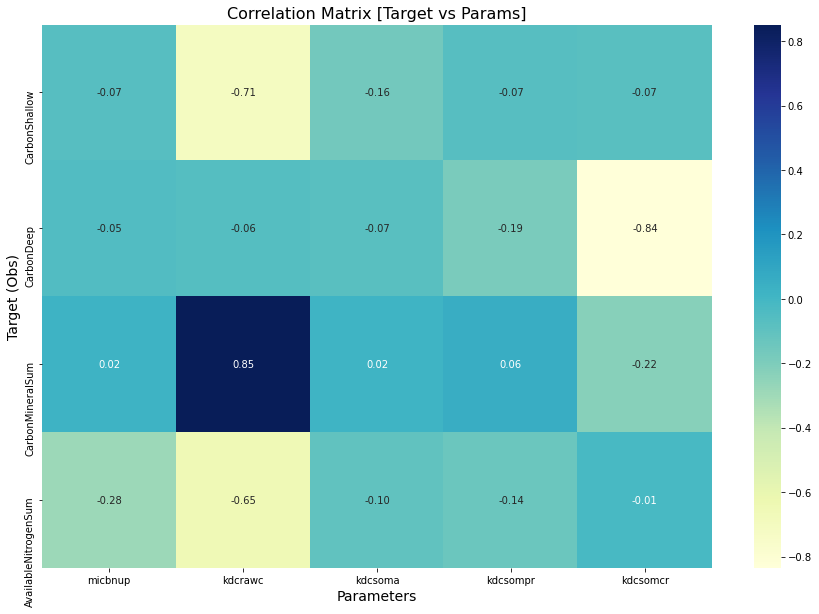

In [75]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

In [88]:
!cat TK/soilC-rkb-cfall-tk-EJ-01/param_props.csv

libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


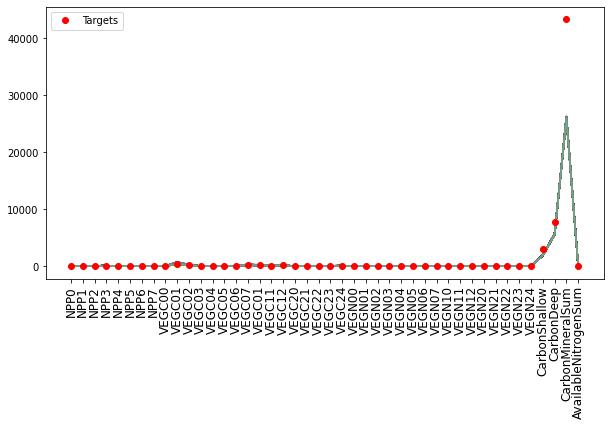

In [98]:
path='TK/soilC-rkb-cfall-tk-EJ-01/' #75% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

output_name = ['rkb00','krb01','krb02','krb03','krb04','krb05','krb06','krb07', \
              'krb10','krb11','krb12', \
              'krb20','krb21','krb22','krb23','krb24',\
              'cfall00','cfall01','cfall02','cfall03','cfall04','cfall05','cfall06','cfall07', \
              'cfall10','cfall11','cfall12', \
              'cfall20','cfall21','cfall22','cfall23','cfall24', \
               'micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr']

df_param.columns = output_name

output_name = [
              'NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07', \
              'VEGC01','VEGC11','VEGC12', \
              'VEGC20','VEGC21','VEGC22','VEGC23','VEGC24',\
              'VEGN00','VEGN01','VEGN02','VEGN03','VEGN04','VEGN05','VEGN06','VEGN07', \
              'VEGN10','VEGN11','VEGN12', \
              'VEGN20','VEGN21','VEGN22','VEGN23','VEGN24', \
              'CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'AvailableNitrogenSum' 
              ]

df_model.columns = output_name
df_model.head()
ut.spaghetti_match_plot(df_param,df_model)